# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Importar librerías

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
from janitor import select_columns 

## Establecer apariencia general de los gráficos

In [2]:
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [3]:
raw_penguins_df =palmerpenguins.load_penguins_raw()
raw_penguins_df

studyName  Sample Number                                    Species   
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)  \
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion   
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  \
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)   
0    2007-11-11                39.1               18.7                181.0  \
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)   
0           3750.0    MALE                NaN                NaN  \
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

#### Datos previamente procesados

In [4]:
penguins_df = palmerpenguins.load_penguins
penguins_df 

<function palmerpenguins.penguins.load_penguins(return_X_y=False, drop_na=False)>

### Utilizando los conjuntos de datos de `seaborn`

In [5]:
sns.load_dataset('penguins')

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0    Adelie  Torgersen            39.1           18.7              181.0  \
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

### Utilizando la interfaz de `Jupyter`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [6]:
raw_penguins_df2 = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv')
pre_penguins_df2 = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')


# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
pre_penguins_df2.dtypes


species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [8]:
(
    pre_penguins_df2
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
Name: count, dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [9]:
pre_penguins_df2.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [10]:
(
    pre_penguins_df2
    .isnull()
)

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0      False   False           False          False              False  \
1      False   False           False          False              False   
2      False   False           False          False              False   
3      False   False            True           True               True   
4      False   False           False          False              False   
..       ...     ...             ...            ...                ...   
339    False   False           False          False              False   
340    False   False           False          False              False   
341    False   False           False          False              False   
342    False   False           False          False              False   
343    False   False           False          False              False   

     body_mass_g    sex   year  
0          False  False  False  
1          False  False  False  
2          False  False  False  
3           True   True  False  
4          False  False  False  
..           ...    ...    ...  
339        False  False  False  
340        False  False  False  
341        False  False  False  
342        False  False  False  
343        False  False  False  

[344 rows x 8 columns]

In [11]:
(
    pre_penguins_df2
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [12]:
(
    pre_penguins_df2
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [13]:
(
    pre_penguins_df2
    .isnull()
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

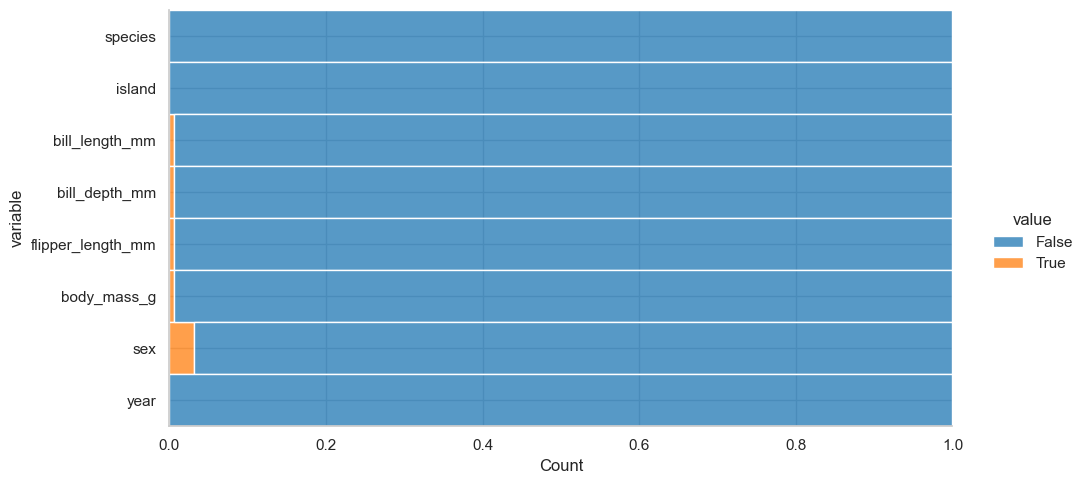

In [14]:
(
    pre_penguins_df2
    .isnull()
    .melt()
    .pipe(
        lambda df: (   
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

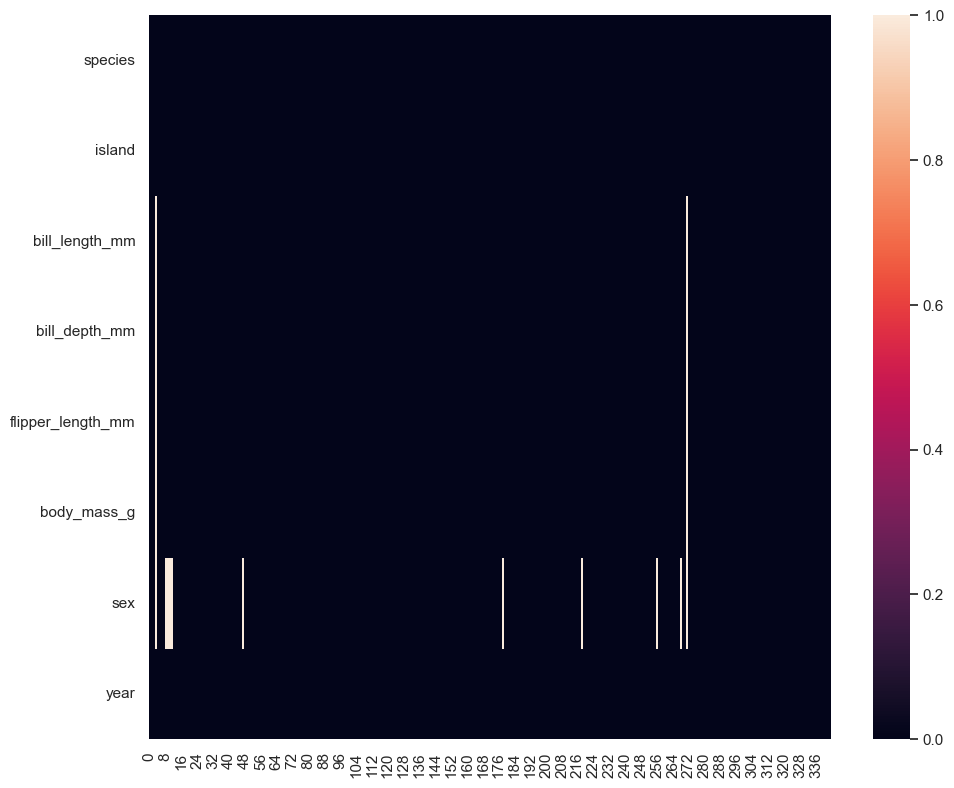

In [15]:
(
    pre_penguins_df2
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
            )
        )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [16]:
pre_penguins_df2.shape

(344, 8)

In [17]:
processed_penguins_df = (
    pre_penguins_df2
    .dropna()
)
processed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0       Adelie  Torgersen            39.1           18.7              181.0  \
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [18]:
processed_penguins_df.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm   
count      333     333      333.000000     333.000000         333.000000  \
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex         year  
count    333.000000   333   333.000000  
unique          NaN     2          NaN  
top             NaN  male          NaN  
freq            NaN   168          NaN  
mean    4207.057057   NaN  2008.042042  
std      805.215802   NaN     0.812944  
min     2700.000000   NaN  2007.000000  
25%     3550.000000   NaN  2007.000000  
50%     4050.000000   NaN  2008.000000  
75%     4775.000000   NaN  2009.000000  
max     6300.000000   NaN  2009.000000

### Solo las numéricas

In [19]:
processed_penguins_df.describe(include=[np.number])

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g   
count      333.000000     333.000000         333.000000   333.000000  \
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

### Solo categóricas - 1

In [20]:
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

### Solo categóricas - 2

In [21]:
(
    processed_penguins_df
    .astype({
        'species':'category',
        'island':'category',
        'sex':'category'
    })
    .describe(include='category')
)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

## ¿Cómo visualizar los conteos?

### Pandas

<Axes: xlabel='species'>

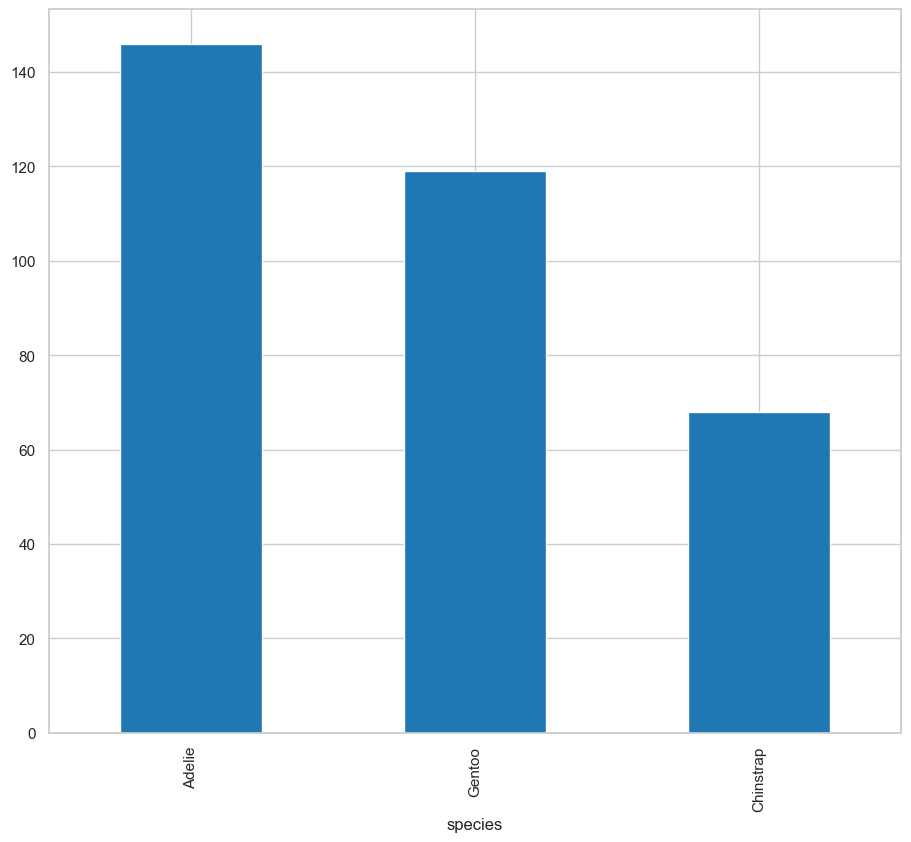

In [22]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar'
    )
)

<Axes: xlabel='sex'>

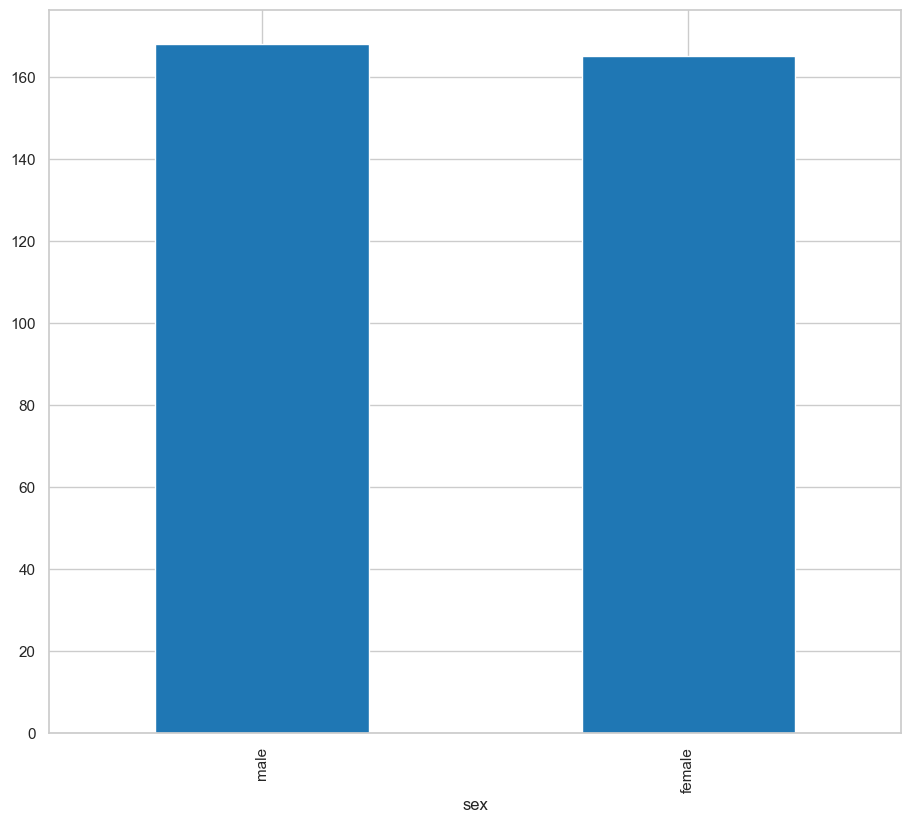

In [23]:
(
    processed_penguins_df
    .sex
    .value_counts()
    .plot(
        kind='bar'
    )
)

### Seaborn

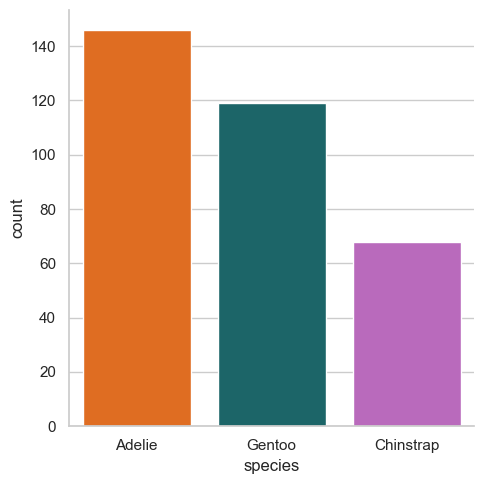

In [24]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color
)

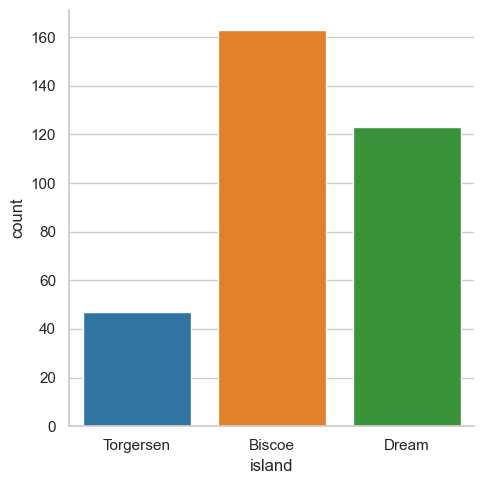

In [25]:
sns.catplot(
    data=processed_penguins_df,
    x='island',
    kind='count'
)

<Axes: xlabel='species', ylabel='count'>

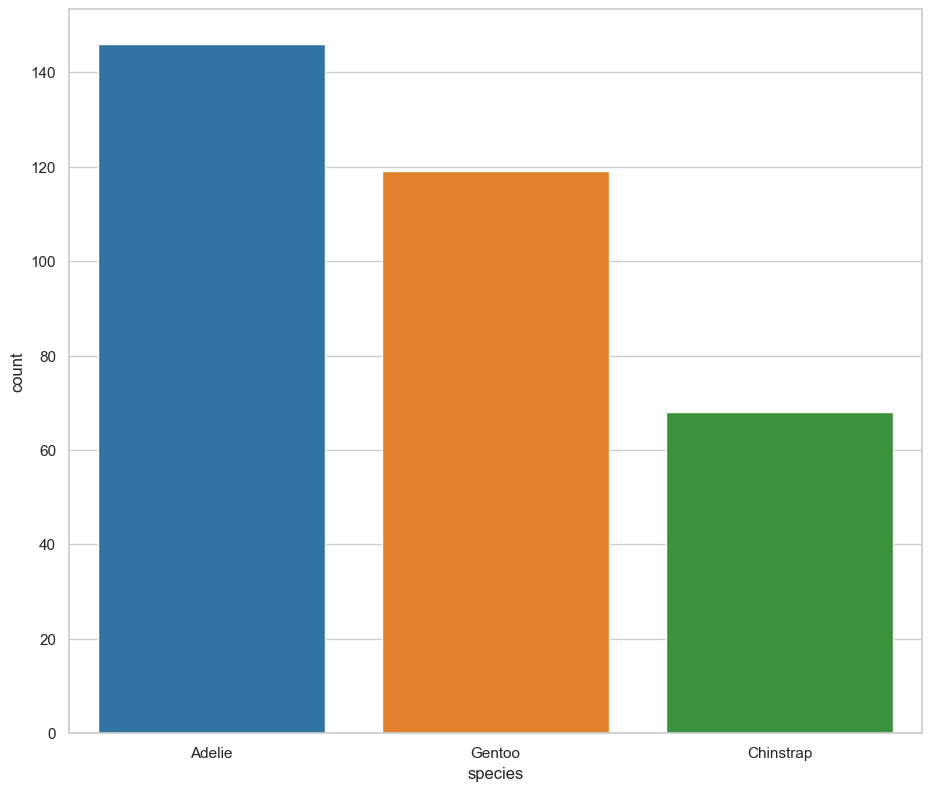

In [26]:
(
    processed_penguins_df
    .value_counts('species',sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df:(
            sns.barplot(
                data=df,
                x='species',
                y='count'
            )
        )
    )
)

<Axes: xlabel='sex', ylabel='count'>

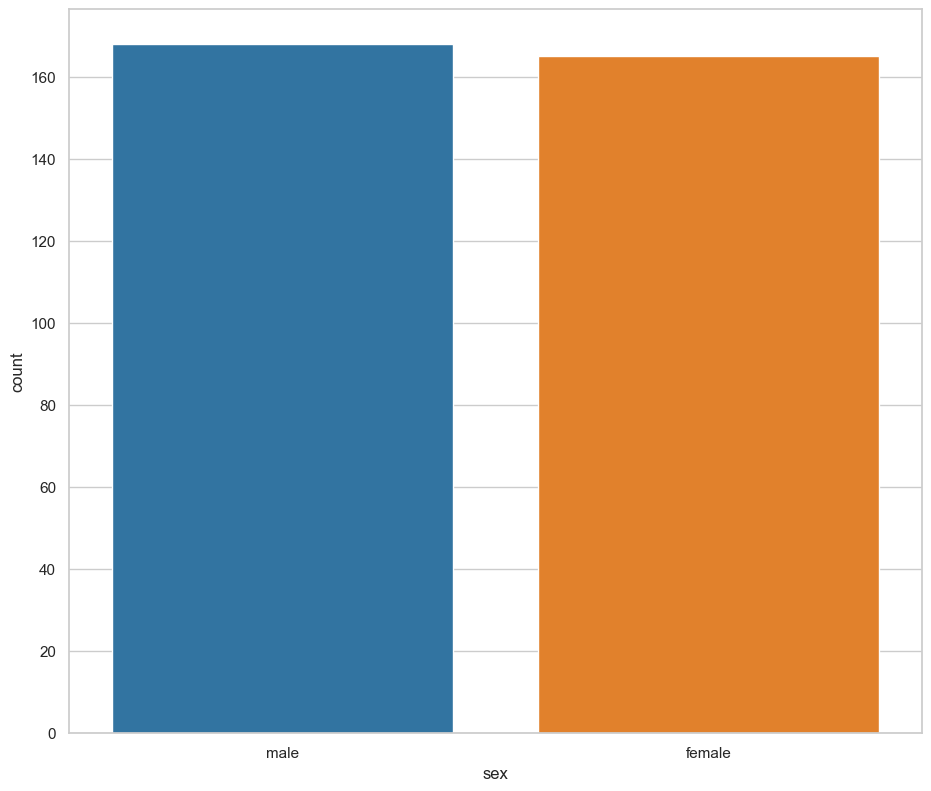

In [27]:
(
    processed_penguins_df
    .value_counts('sex',sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df:(
            sns.barplot(
                data=df,
                x='sex',
                y='count'
            )
        )
    )
)

### ¿Cómo visualizar las proporciones?

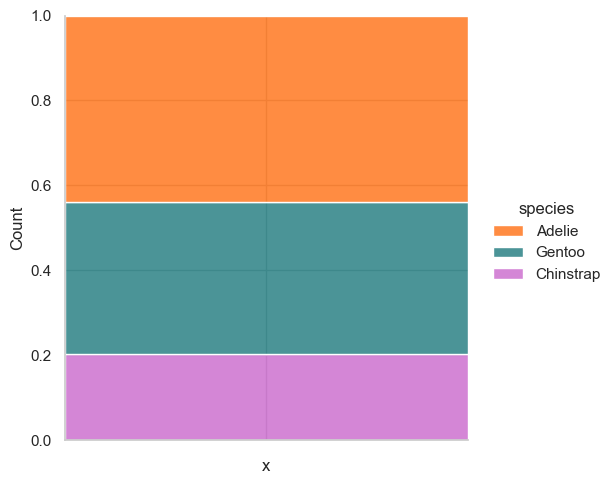

In [28]:
(
    processed_penguins_df
    .add_column('x','')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color                
                )
        )
    )
)

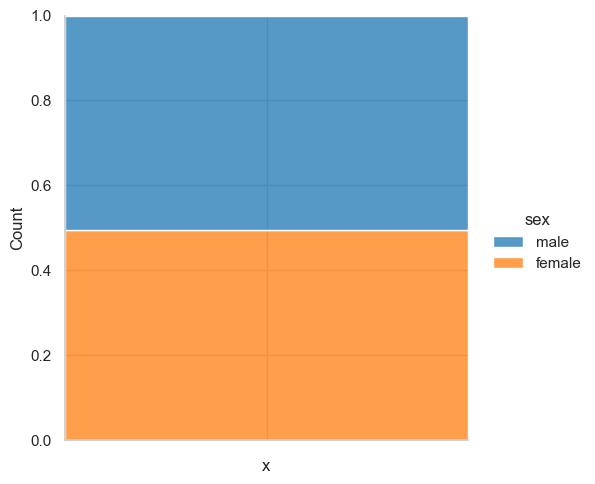

In [29]:
(
    processed_penguins_df
    .add_column('x','')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='sex',
                multiple='fill'               
                )
        )
    )
)

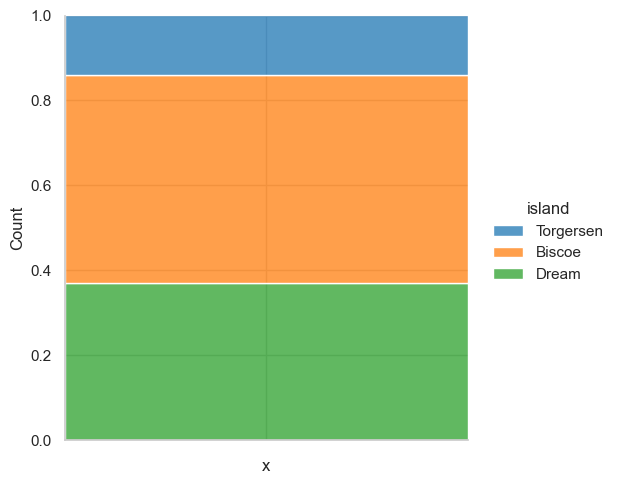

In [30]:
(
    processed_penguins_df
    .add_column('x','')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='island',
                multiple='fill'               
                )
        )
    )
)

# Medidas de tendencia central

## Media o promedio

In [31]:
processed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [32]:
np.mean(
    processed_penguins_df.bill_depth_mm
)

17.164864864864867

In [33]:
(
    processed_penguins_df
    .select_dtypes(include=np.number)
    .mean()
)


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [34]:
(
    processed_penguins_df
    .select_dtypes(include=np.number)
    .median()
)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [35]:
processed_penguins_df.mode()


species  island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0  Adelie  Biscoe            41.1           17.0              190.0  \

   body_mass_g   sex  year  
0       3800.0  male  2009

In [36]:
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [37]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [38]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [39]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [40]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [41]:
processed_penguins_df.mean(numeric_only=True) + processed_penguins_df.std(numeric_only=True)

bill_length_mm         49.461461
bill_depth_mm          19.134100
flipper_length_mm     214.982732
body_mass_g          5012.272859
year                 2008.854986
dtype: float64

In [42]:
processed_penguins_df.mean(numeric_only=True) - processed_penguins_df.std(numeric_only=True)

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [43]:
processed_penguins_df.quantile(0.75,numeric_only=True)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [44]:
processed_penguins_df.quantile(0.75,numeric_only=True) - processed_penguins_df.quantile(0.25,numeric_only=True)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [45]:
(
    processed_penguins_df
    .quantile(
        q=[0.75,0.50,0.25],
        numeric_only=True
    )
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df : df[0.75] - df[0.25]
    )
)

variable    0.75     0.5    0.25     iqr
0     bill_length_mm    48.6    44.5    39.5     9.1
1      bill_depth_mm    18.7    17.3    15.6     3.1
2  flipper_length_mm   213.0   197.0   190.0    23.0
3        body_mass_g  4775.0  4050.0  3550.0  1225.0
4               year  2009.0  2008.0  2007.0     2.0

## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

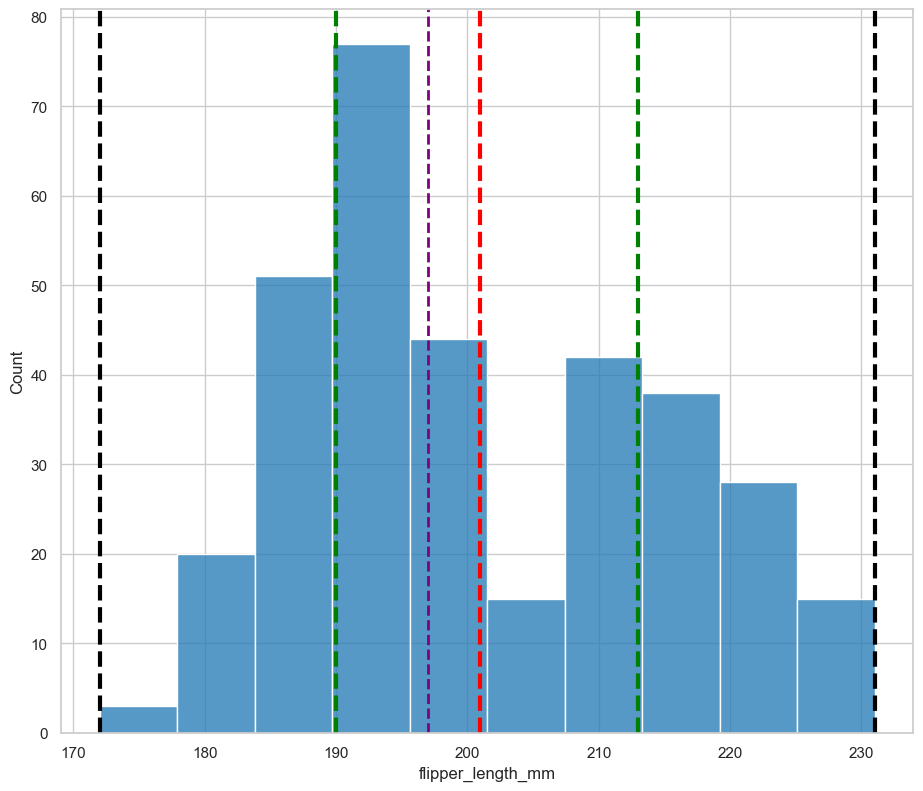

In [46]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=3
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='green',
    linestyle='dashed',
    linewidth=3
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='green',
    linestyle='dashed',
    linewidth=3
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='purple',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.min(),
    color='black',
    linestyle='dashed',
    linewidth=3
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.max(),
    color='black',
    linestyle='dashed',
    linewidth=3
)



### Diagrama de caja / boxplot

<Axes: xlabel='flipper_length_mm', ylabel='species'>

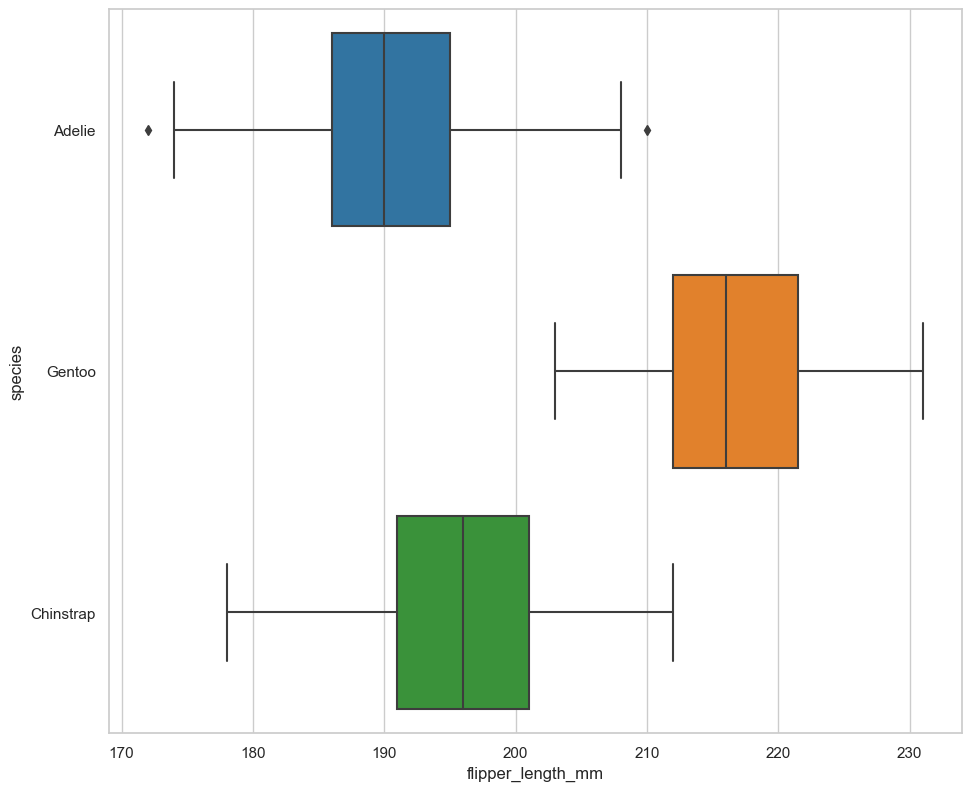

In [47]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species'
) 

### Limitaciones

In [48]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

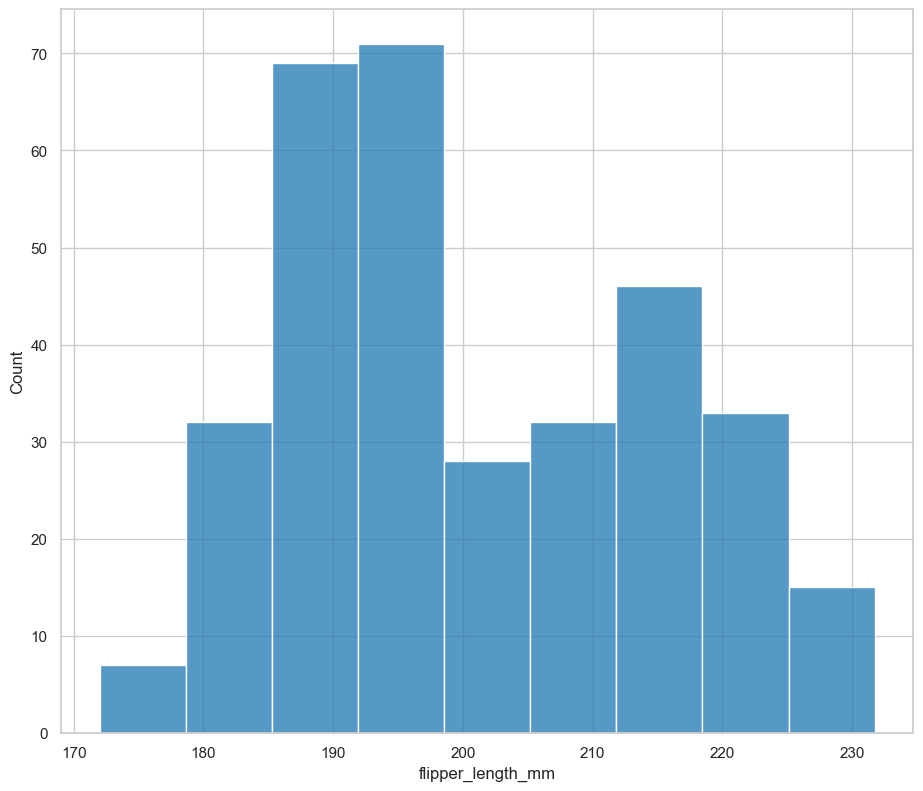

In [49]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth= freedman_diaconis_bindwidth(processed_penguins_df.flipper_length_mm)
)


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

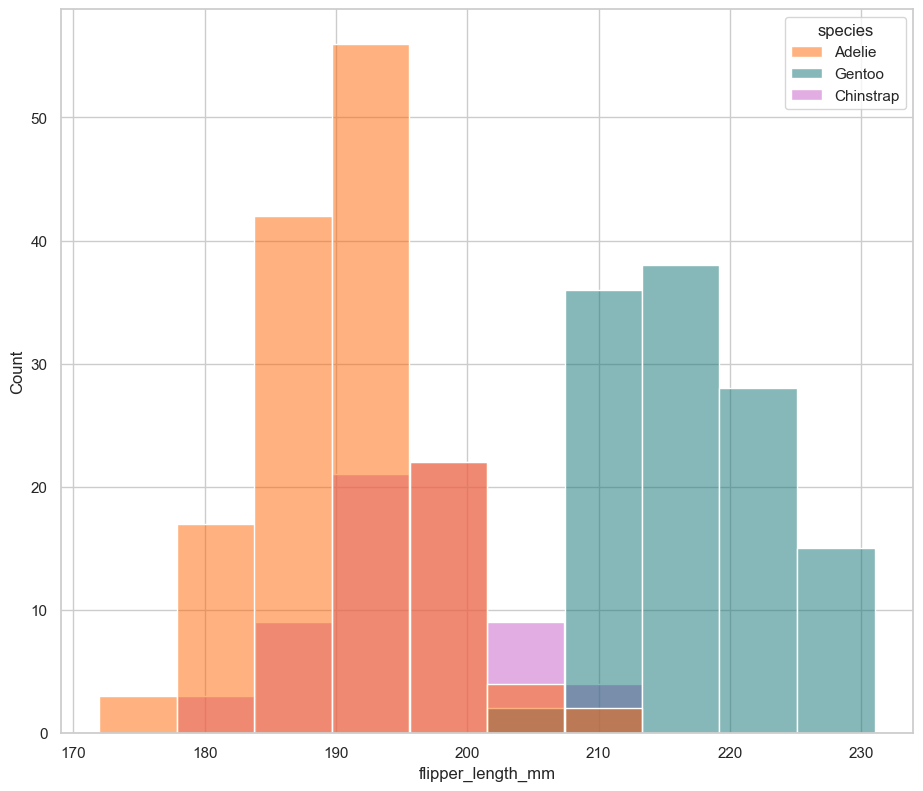

In [50]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)



<Axes: xlabel='flipper_length_mm', ylabel='Count'>

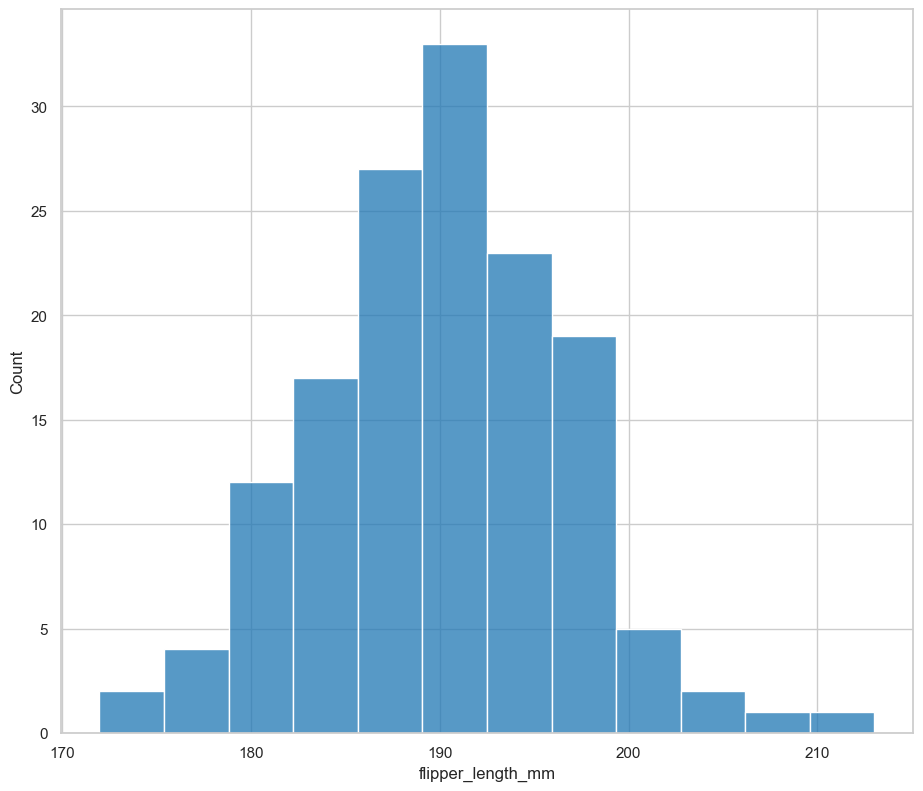

In [51]:
sns.histplot(
    data=processed_penguins_df[processed_penguins_df['species']=='Adelie'],
    x='flipper_length_mm',
    binwidth= freedman_diaconis_bindwidth(processed_penguins_df[processed_penguins_df['species']=='Adelie'].flipper_length_mm)
)


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

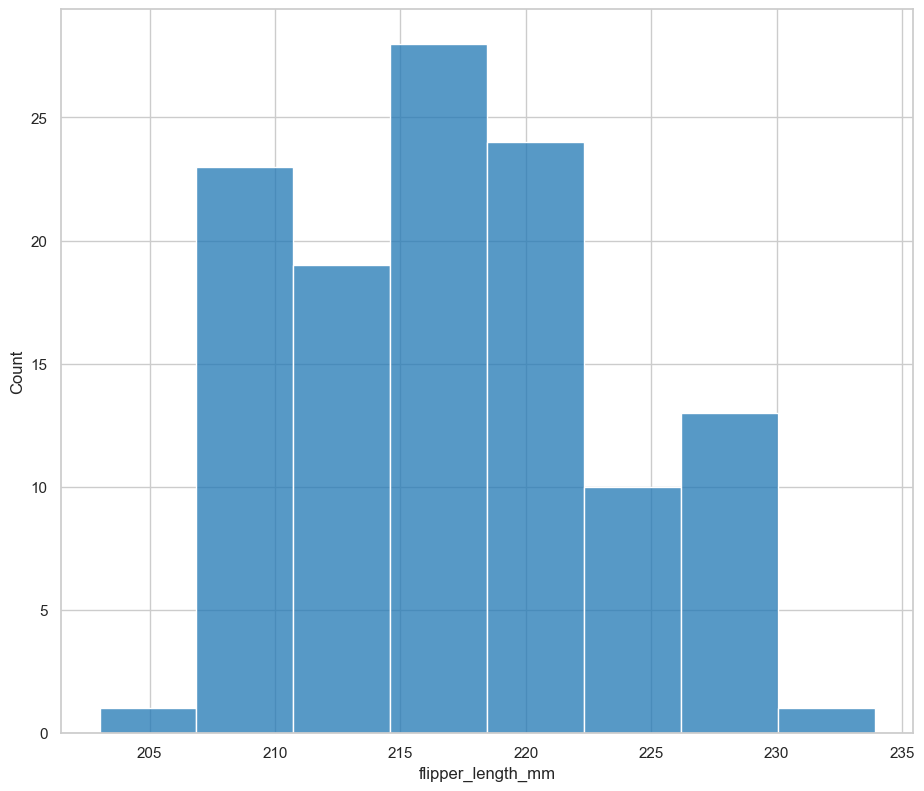

In [52]:
sns.histplot(
    data=processed_penguins_df[processed_penguins_df['species']=='Gentoo'],
    x='flipper_length_mm',
    binwidth= freedman_diaconis_bindwidth(processed_penguins_df[processed_penguins_df['species']=='Gentoo'].flipper_length_mm)
)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

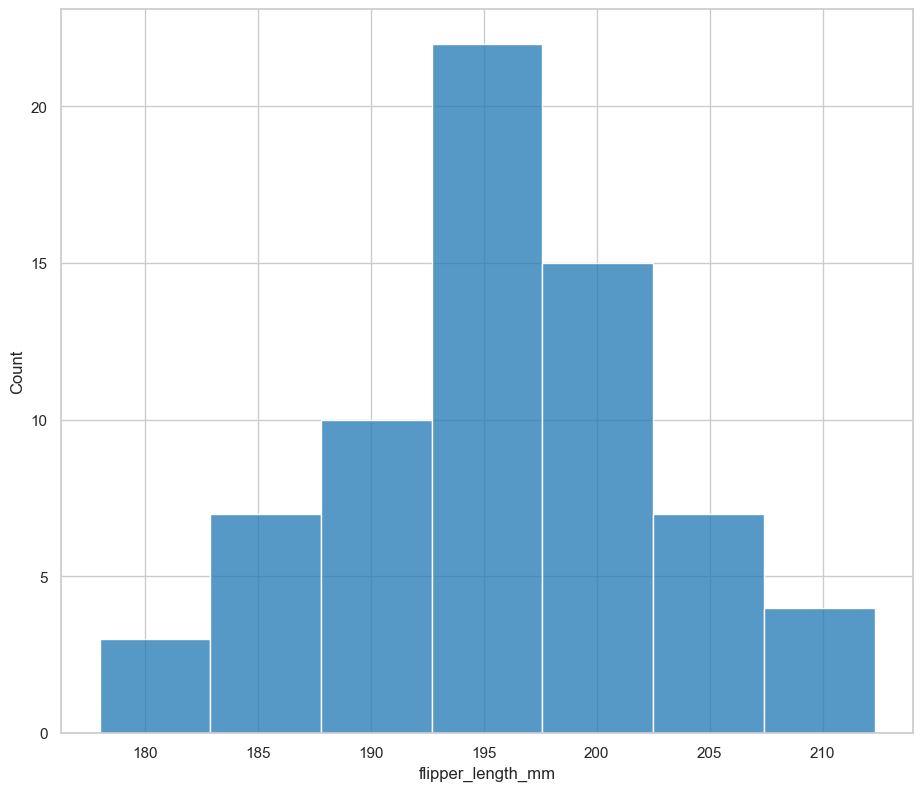

In [53]:
sns.histplot(
    data=processed_penguins_df[processed_penguins_df['species']=='Chinstrap'],
    x='flipper_length_mm',
    binwidth= freedman_diaconis_bindwidth(processed_penguins_df[processed_penguins_df['species']=='Chinstrap'].flipper_length_mm)
)

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

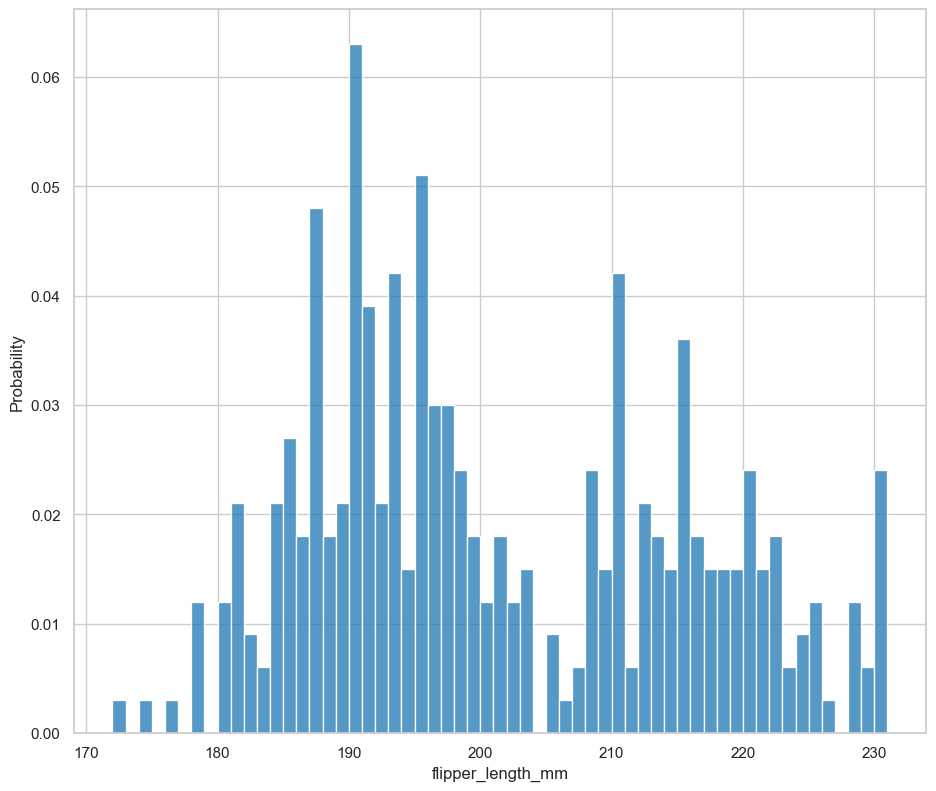

In [54]:
sns.histplot(
    data=processed_penguins_df,
    x= 'flipper_length_mm',
    binwidth=1,
    stat='probability'
)

### Utilizando `empiricaldist`

In [55]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

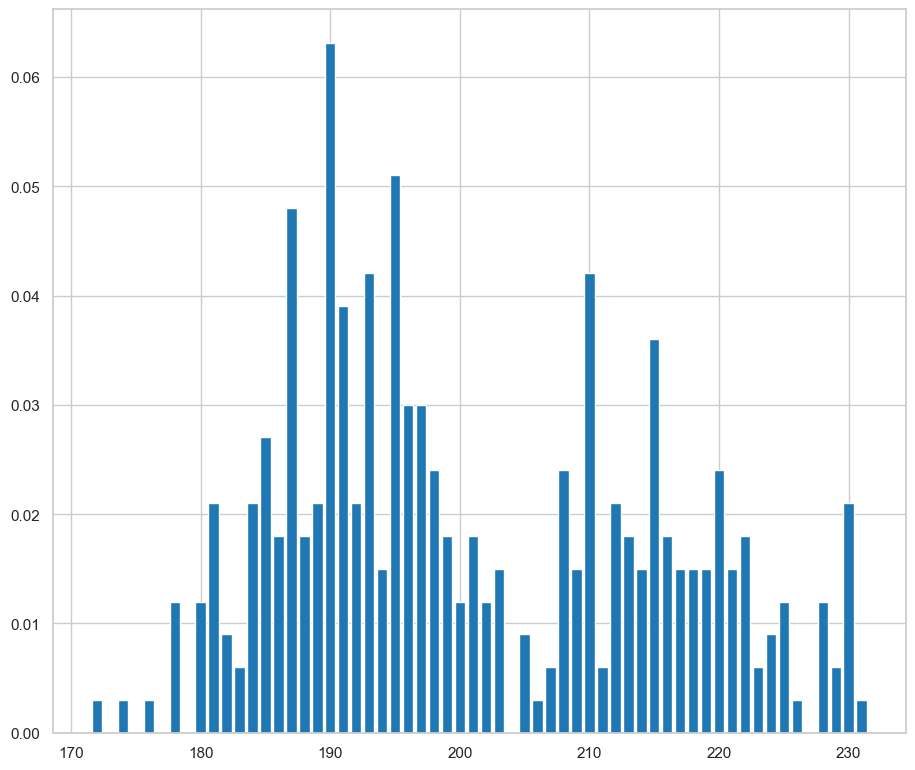

In [56]:
pmf_flipper_length_mm.bar()

In [57]:
pmf_flipper_length_mm(190)

0.06306306306306306

In [58]:
processed_penguins_df.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

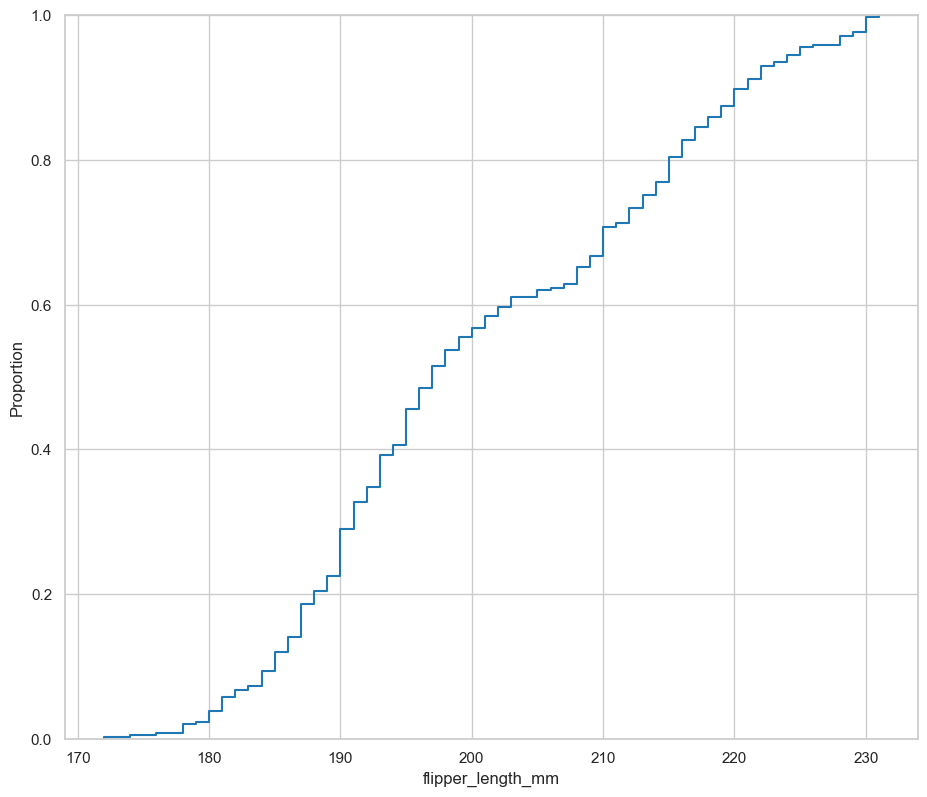

In [59]:
sns.ecdfplot(
    data=pre_penguins_df2,
    x='flipper_length_mm'
)

### Utilizando `empiricaldist`

In [60]:
cdf_pmf_flipper_length_mm  = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

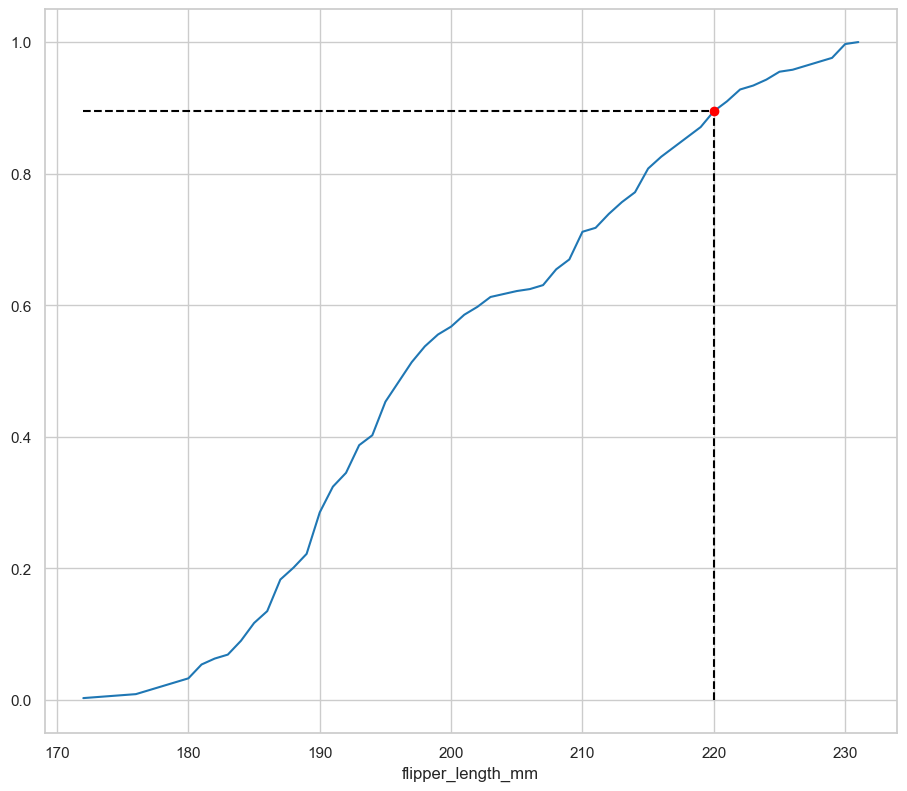

In [61]:
cdf_pmf_flipper_length_mm.plot()

q = 220
p = cdf_pmf_flipper_length_mm.forward(q)

plt.vlines(
    x = q,
    ymin = 0,
    ymax = p,
    color = 'black',
    linestyle = 'dashed'
)
plt.hlines(
    y = p,
    xmin = pmf_flipper_length_mm.qs[0],
    xmax = q,
    color = 'black',
    linestyle = 'dashed'
)

plt.plot(q,p,'ro')

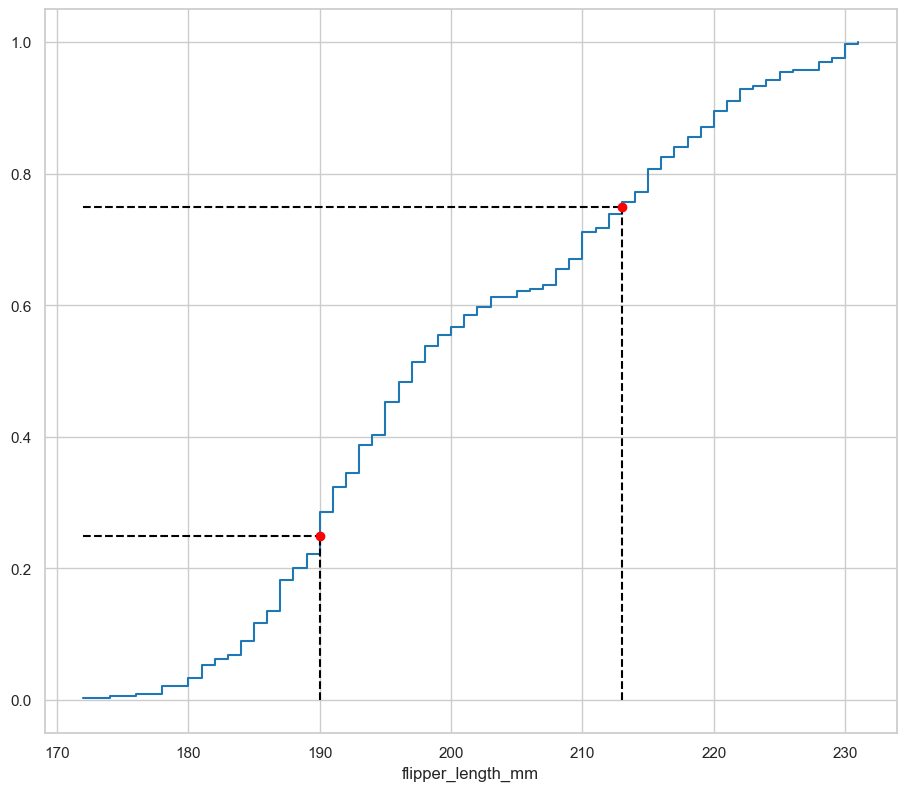

In [62]:
cdf_pmf_flipper_length_mm.step()

p_1 = 0.25 #specific probability
p_2 = 0.75

ps = (p_1,p_2) #IQR
qs = cdf_pmf_flipper_length_mm.inverse(ps)

plt.vlines(
    x = qs,
    ymin = 0,
    ymax = ps,
    color = 'black',
    linestyle = 'dashed'
)
plt.hlines(
    y = ps,
    xmin = pmf_flipper_length_mm.qs[0],
    xmax = qs,
    color = 'black',
    linestyle = 'dashed'
)
plt.scatter(
    x = qs,
    y = ps,
    color = 'red',
    zorder = 2
)

### Comparando distribuciones

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

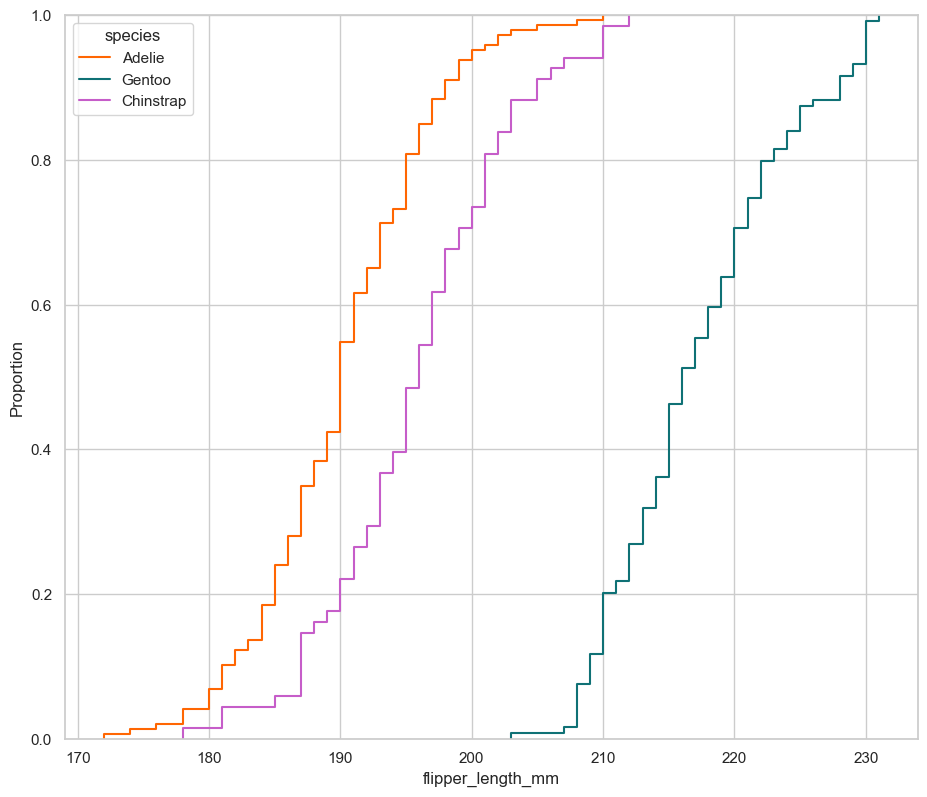

In [63]:
sns.ecdfplot(
    data= processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

## Funciones de densidad de probabilidad

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

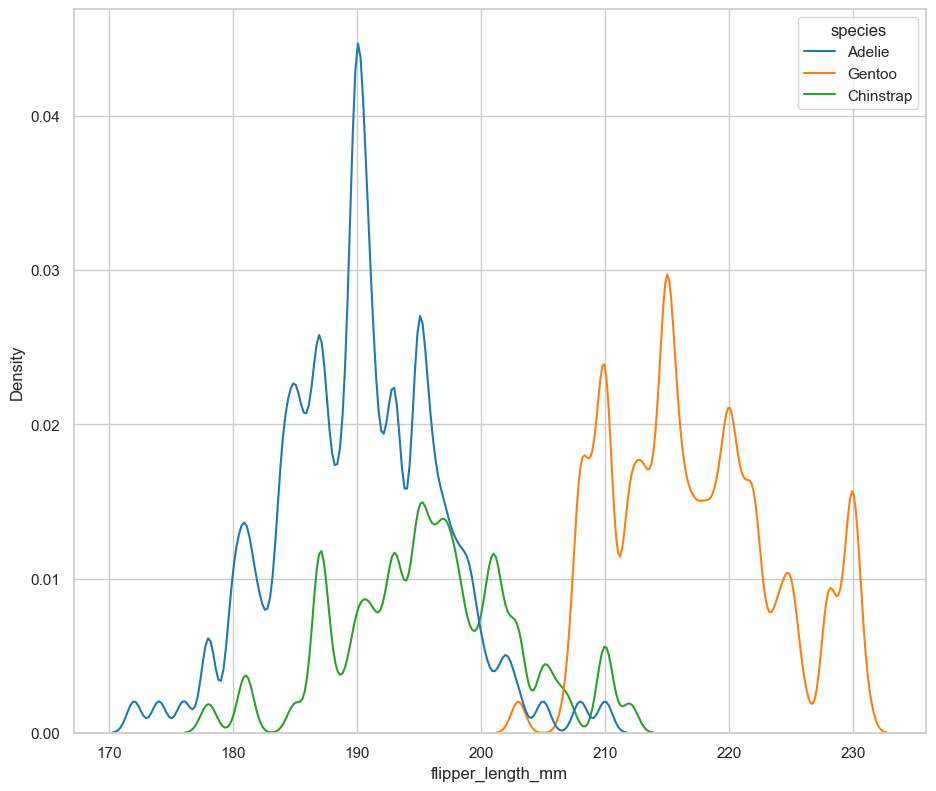

In [64]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.09,
    hue='species'
)

In [65]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<Axes: xlabel='body_mass_g'>

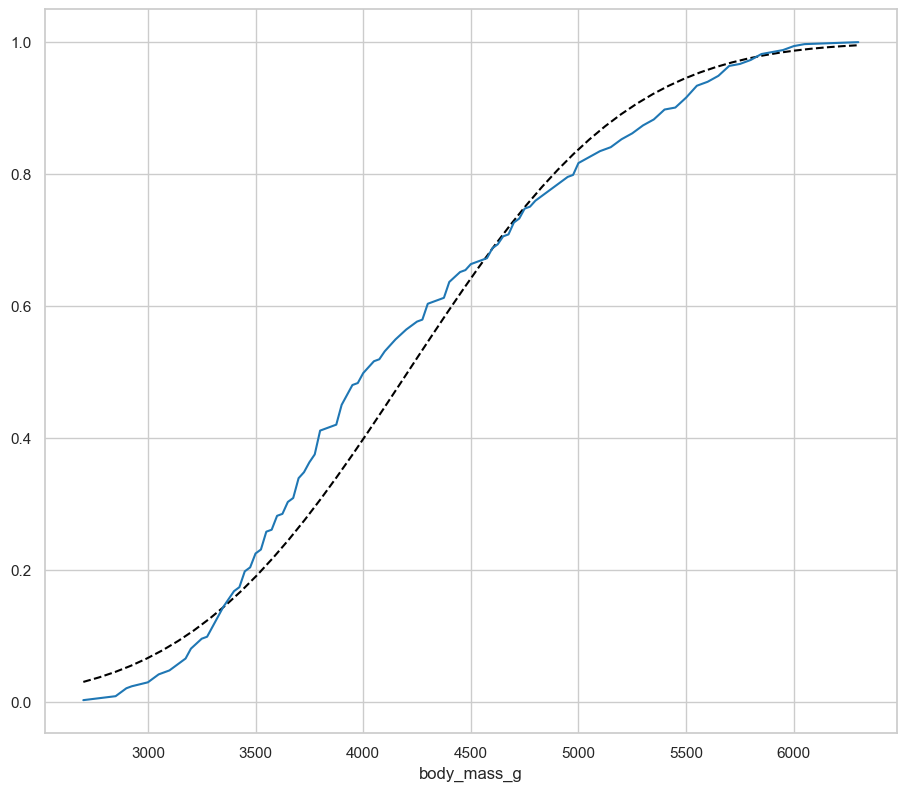

In [66]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)

plt.plot(xs,ys,color='black',linestyle='dashed')

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<Axes: xlabel='body_mass_g', ylabel='Density'>

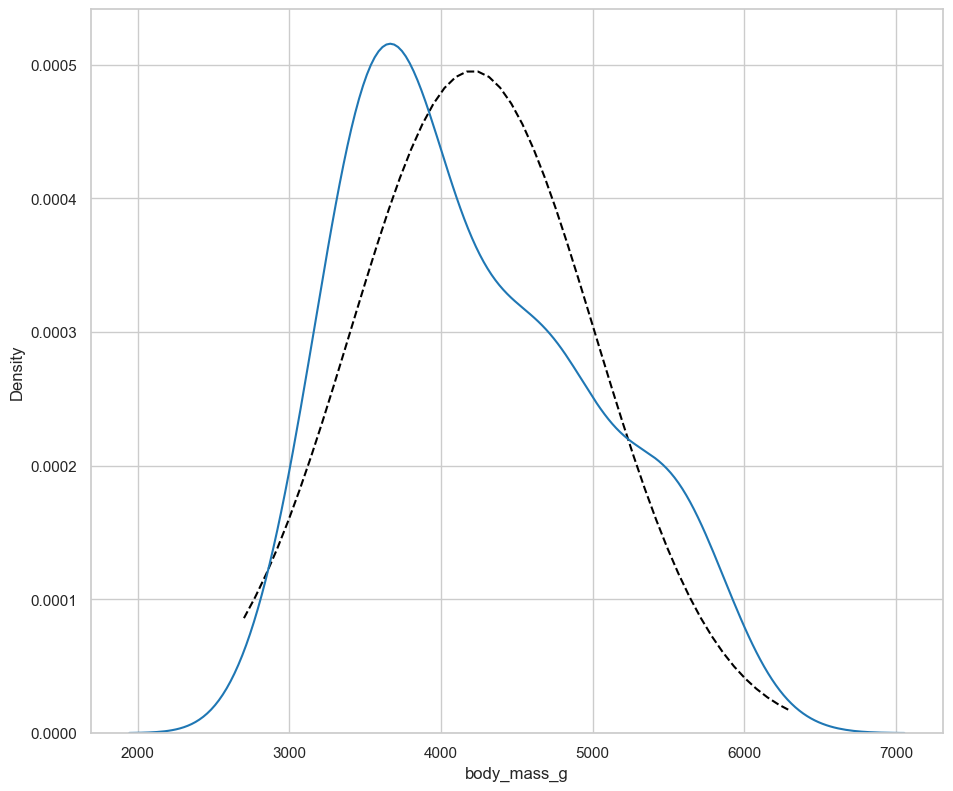

In [67]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)

plt.plot(xs,ys,color='black',linestyle='dashed')

sns.kdeplot(
    data = processed_penguins_df,
    x='body_mass_g'
)

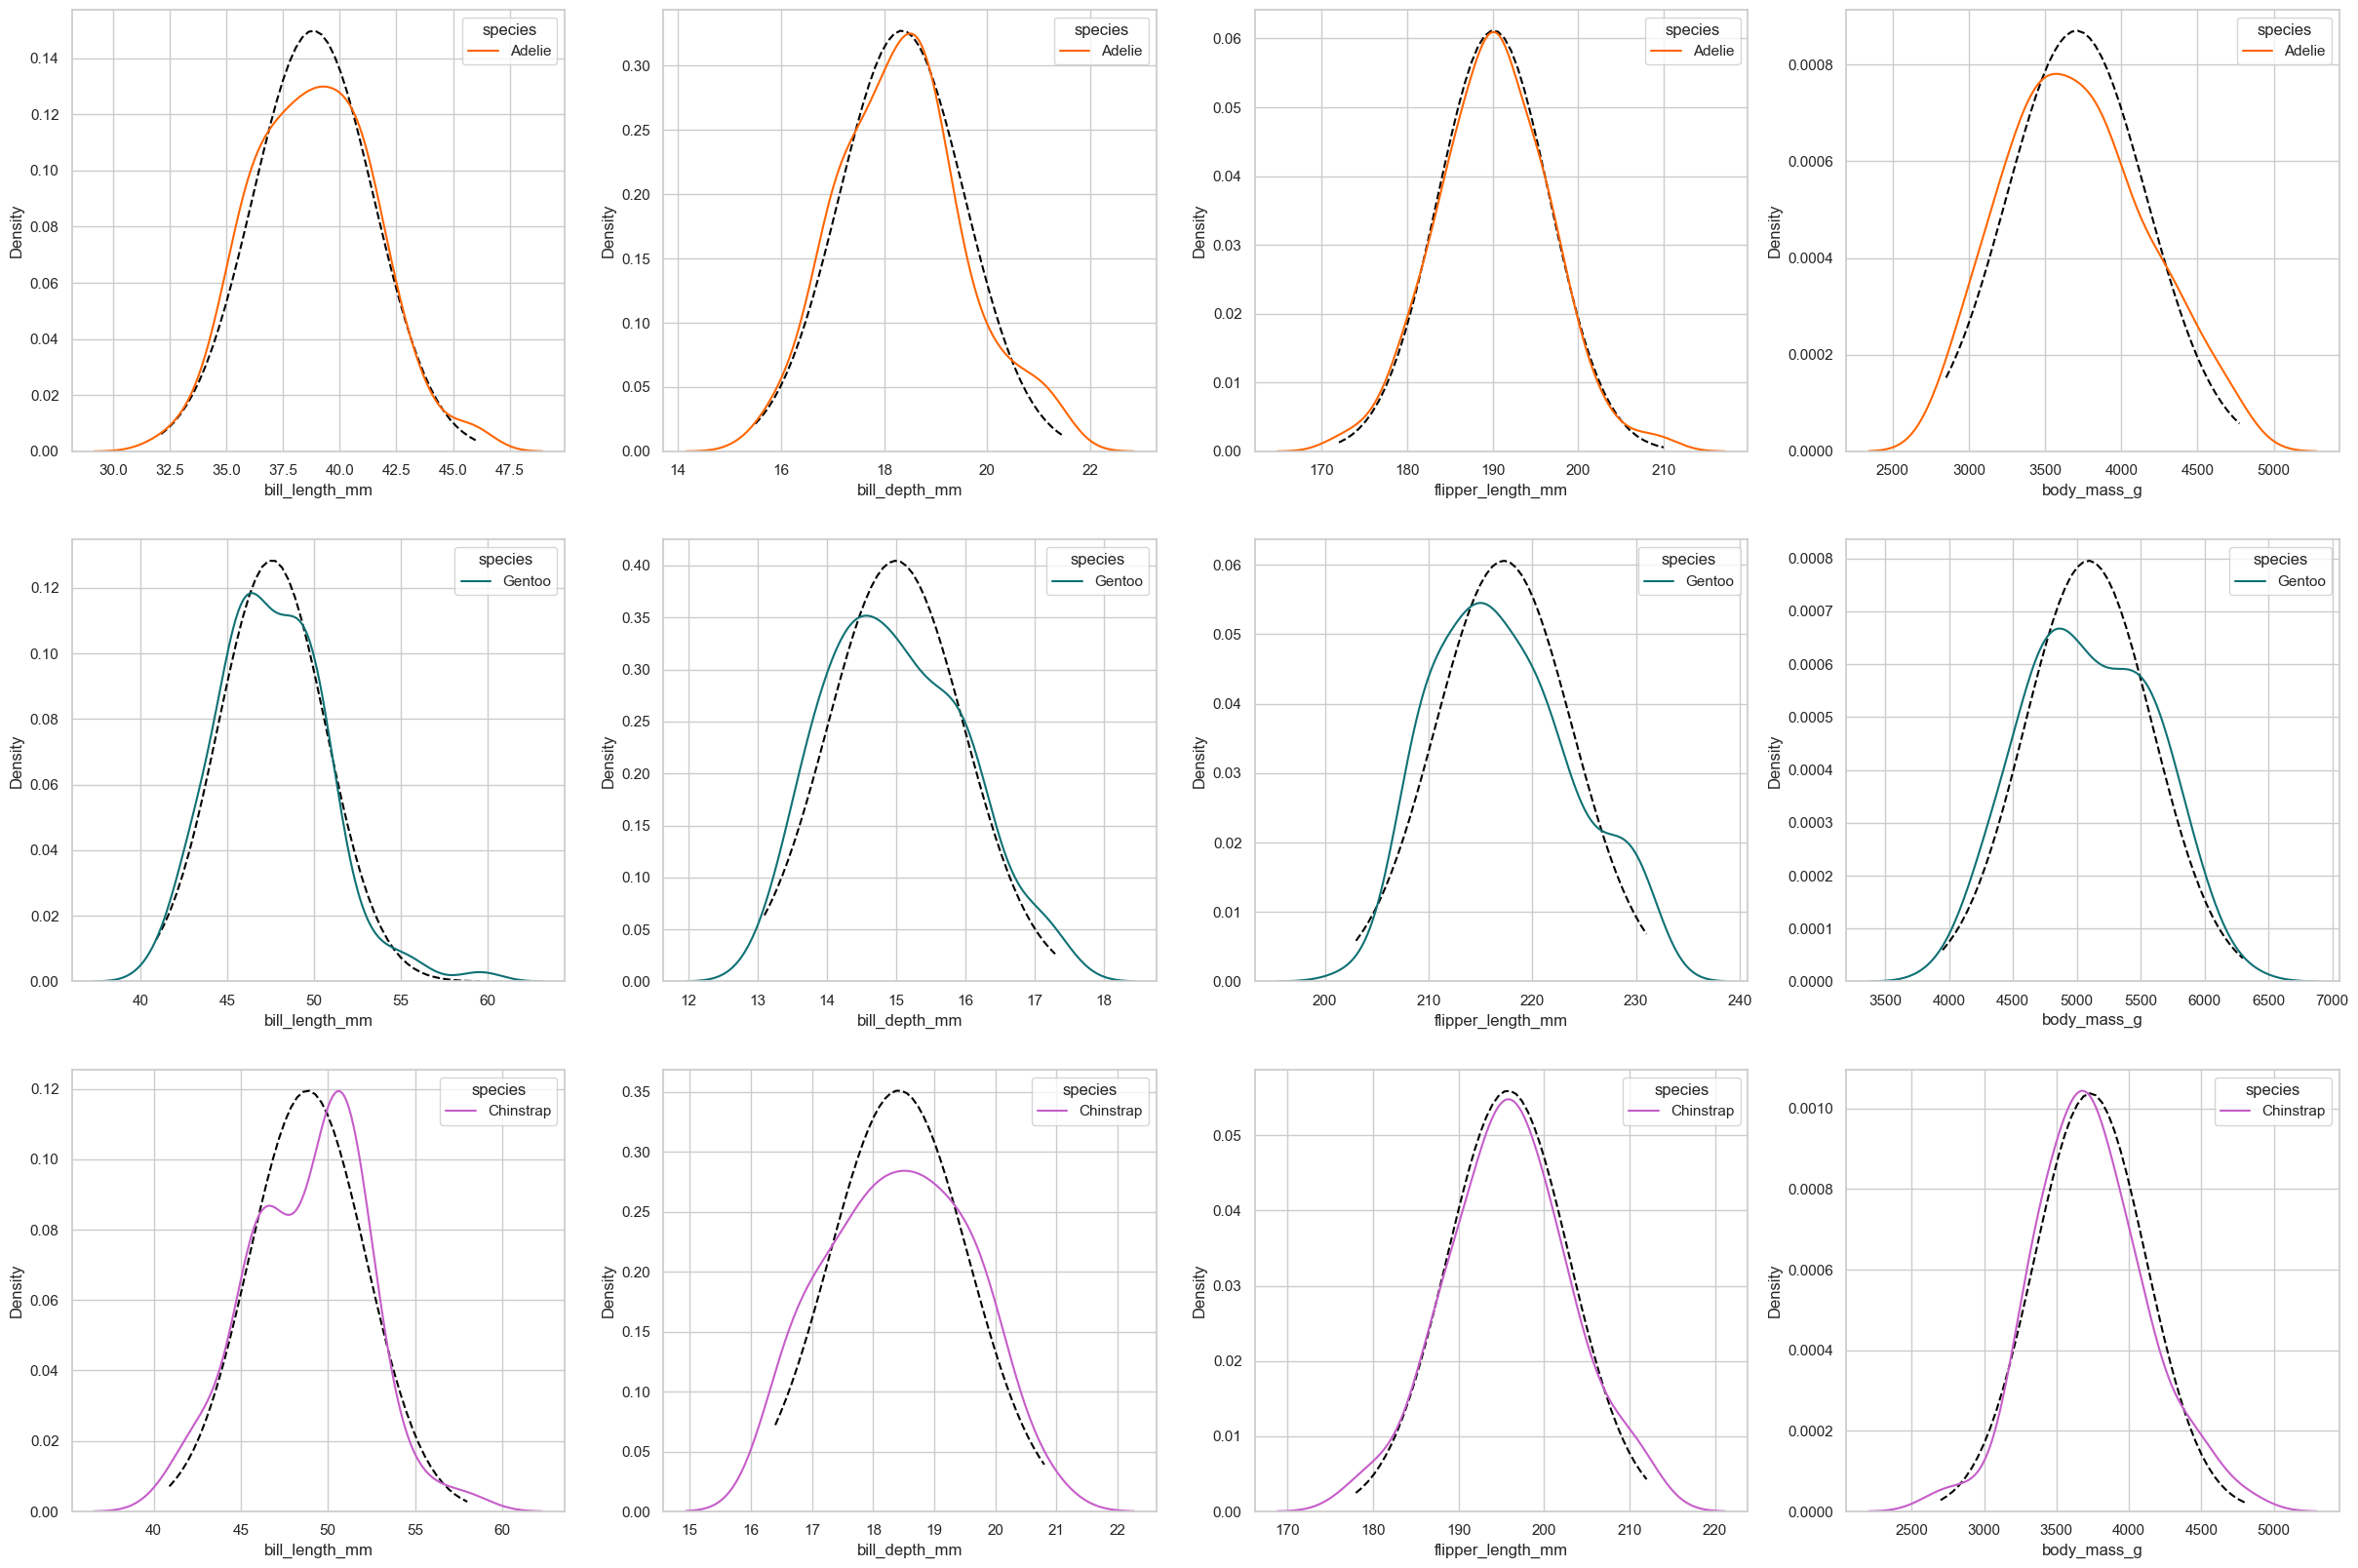

In [68]:
# Filtros

adelie_df = processed_penguins_df.query("species == 'Adelie'")
gentoo_df = processed_penguins_df.query("species == 'Gentoo'")
chinstrap_df = processed_penguins_df.query("species == 'Chinstrap'")

specie = [adelie_df,gentoo_df,chinstrap_df]
numeric_columns = processed_penguins_df.select_dtypes(include=np.number).columns
numeric_columns = numeric_columns.drop('year')

fig, ax = plt.subplots(3,4,figsize=(30,20))
for i, i_col in enumerate(specie):
    for j, j_col in enumerate(numeric_columns):
        stats = i_col[j_col].describe()

        xs = np.linspace(stats['min'],stats['max']) 
        ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

        ax[i][j].plot(xs,ys, color='black',linestyle='--')

        sns.kdeplot(
            ax = ax[i][j],
            data = i_col,
            x=j_col,
            hue='species',
            palette=penguin_color
        ) 


# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

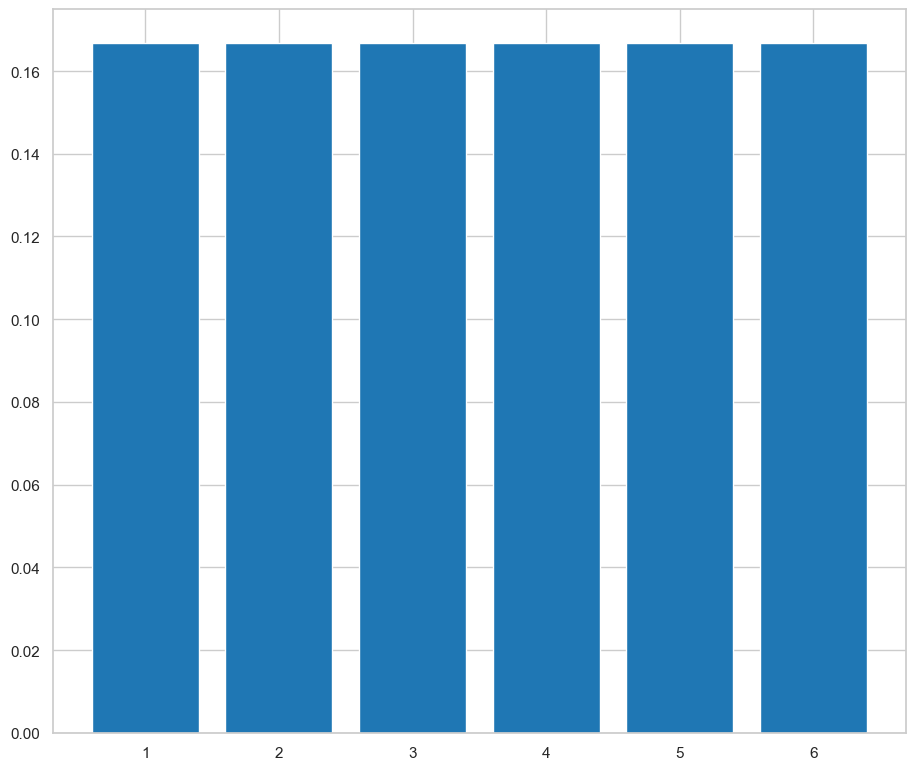

In [69]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

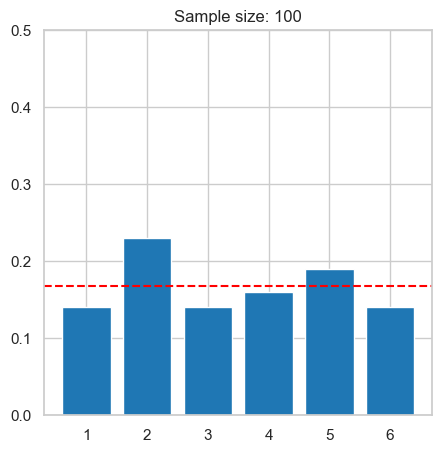

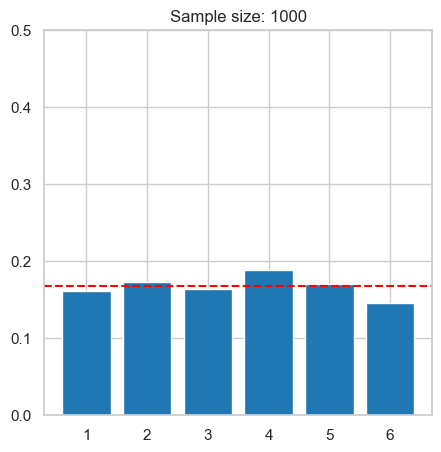

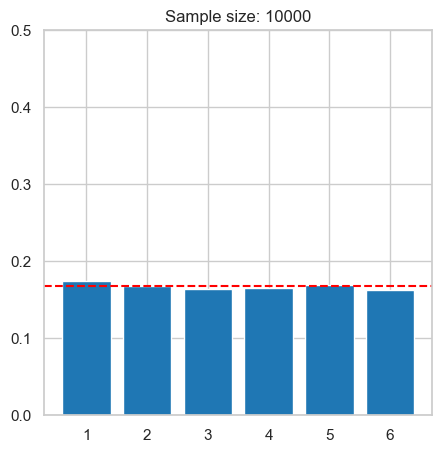

In [70]:
for sample_size in (1e2 , 1e3 , 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(
        y=1/6,
        color='red',
        linestyle ='dashed'
    )
    plt.ylim([0,0.5])
    plt.title(f"Sample size: {sample_size}")

## Teorema del Límite Central

In [71]:
processed_penguins_df.sex.value_counts(normalize=True)

sex
male      0.504505
female    0.495495
Name: proportion, dtype: float64

In [72]:
sex_numeric = processed_penguins_df.sex.replace(['male','female'],[1,0])


In [73]:
number_samples = 1000
sample_size = 35

np.random.seed(42)

samples_list = []
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    samples_list.append(sex_numeric_sample)

samples_df = pd.DataFrame(np.column_stack(samples_list), columns=[f"sample_{i}" for i in range(1, number_samples + 1)])

male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

Estimated percentage of male penguins in population is: 50.1829%


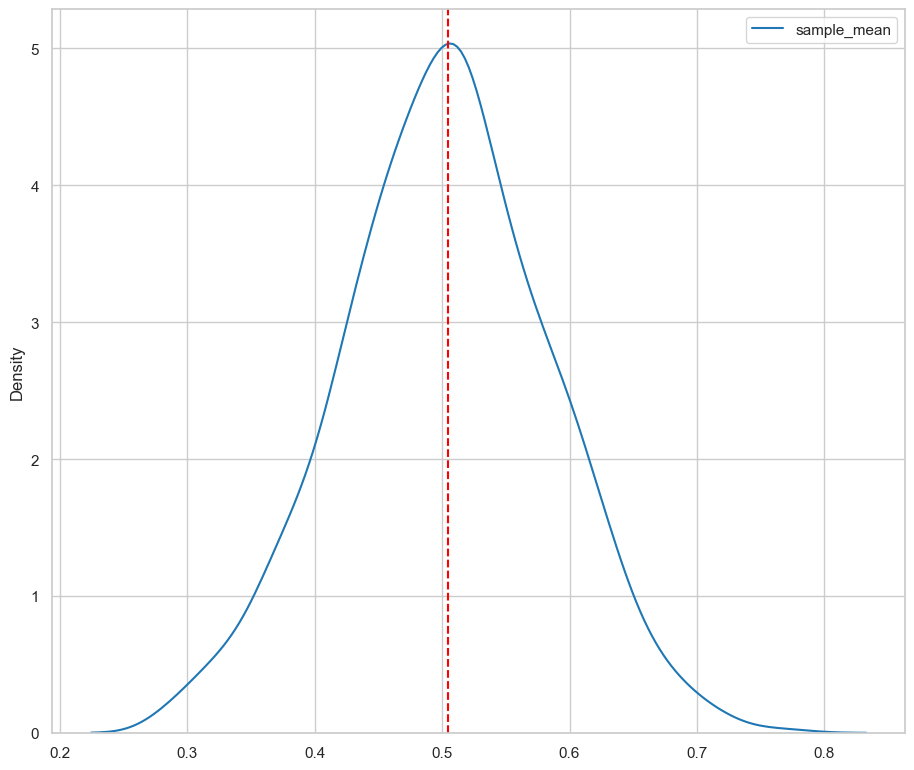

In [74]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(),color='red', linestyle='dashed')

In [75]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

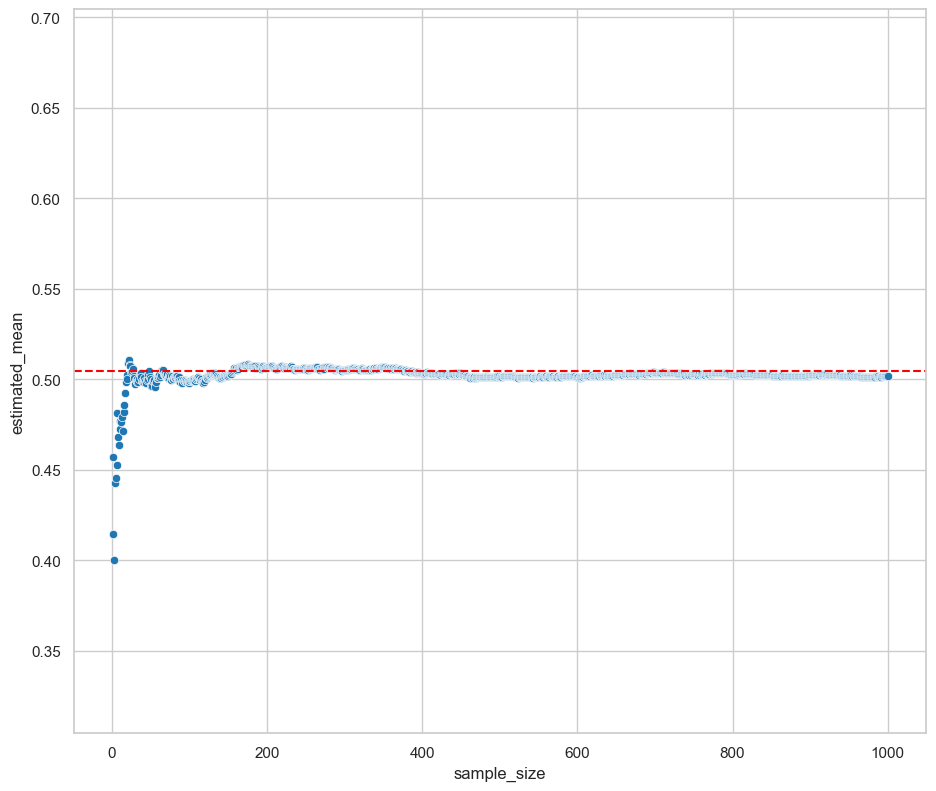

In [76]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Estableciendo relaciones: Gráfica de puntos

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

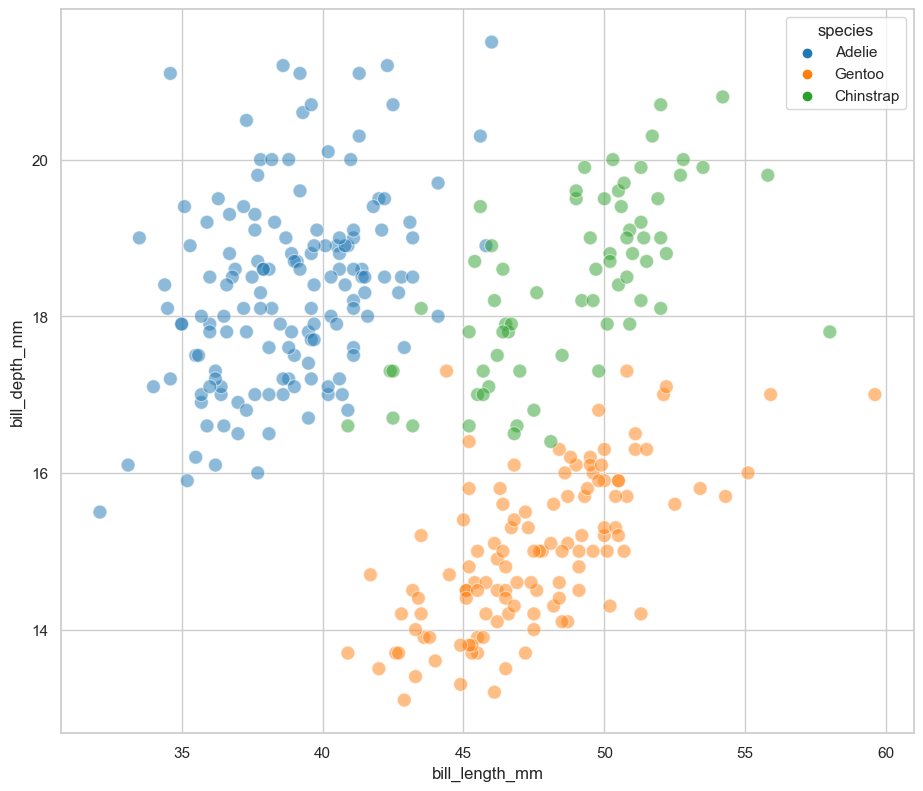

In [77]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    alpha=1/2,
    s=100
)

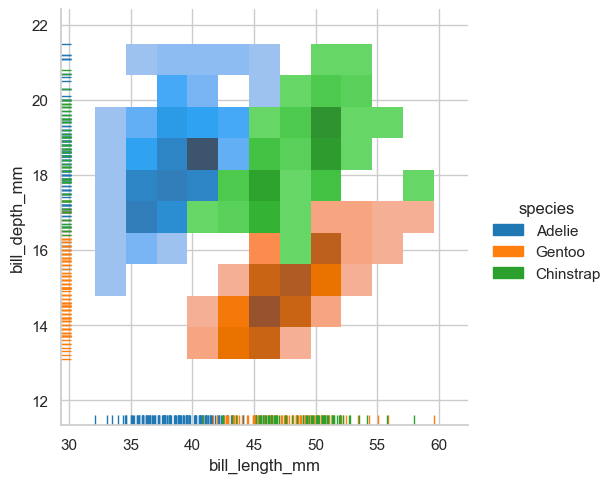

In [78]:
sns.displot(
    data= processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    hue='species'
)

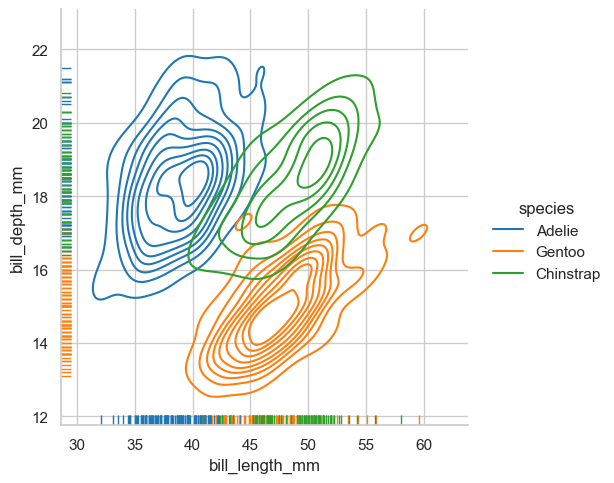

In [79]:
sns.displot(
    data= processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    hue='species',
    kind='kde'
)

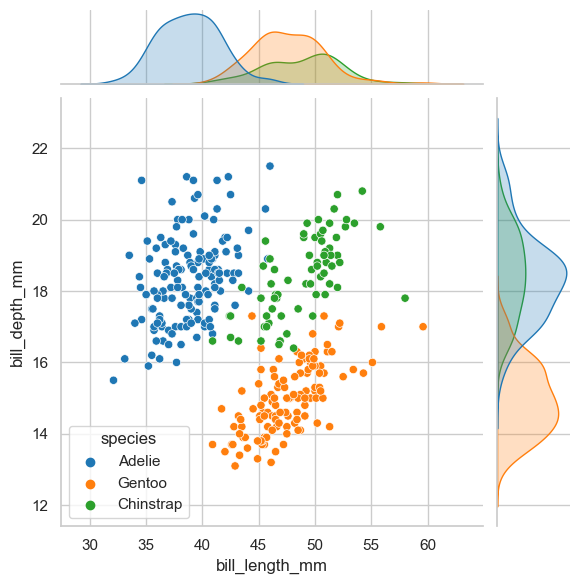

In [80]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)

# Estableciendo relaciones: Gráficos de violín y boxplots

<Axes: xlabel='species', ylabel='body_mass_g'>

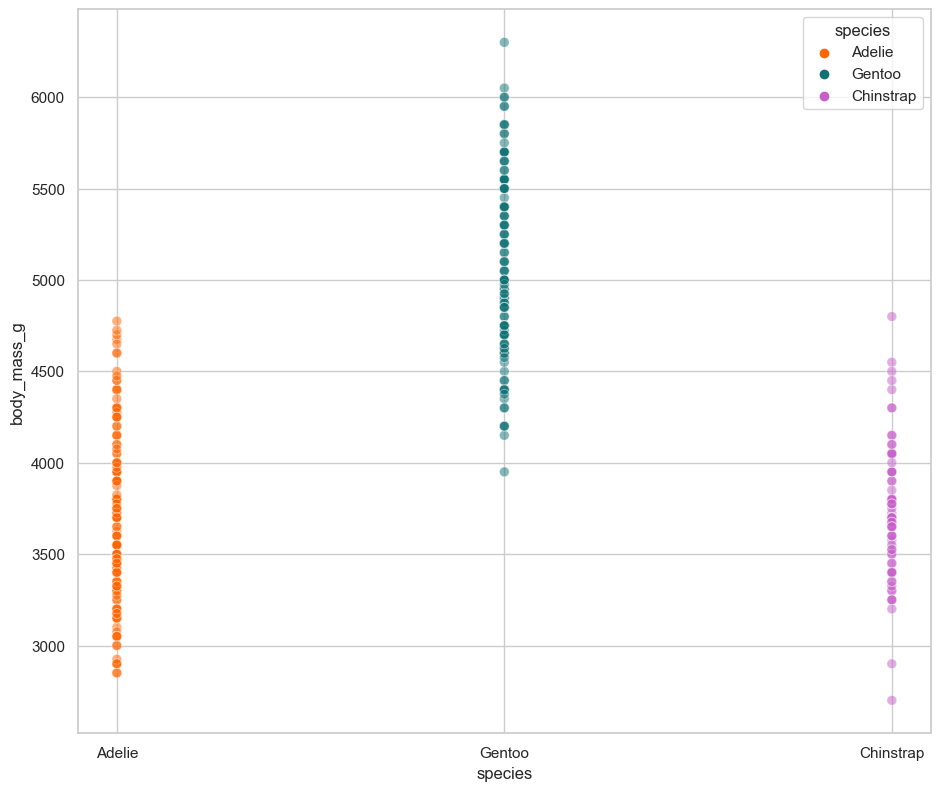

In [81]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='body_mass_g',
    hue='species',
    palette=penguin_color,
    alpha=1/2,
    s=50
)

<Axes: xlabel='species', ylabel='body_mass_g'>

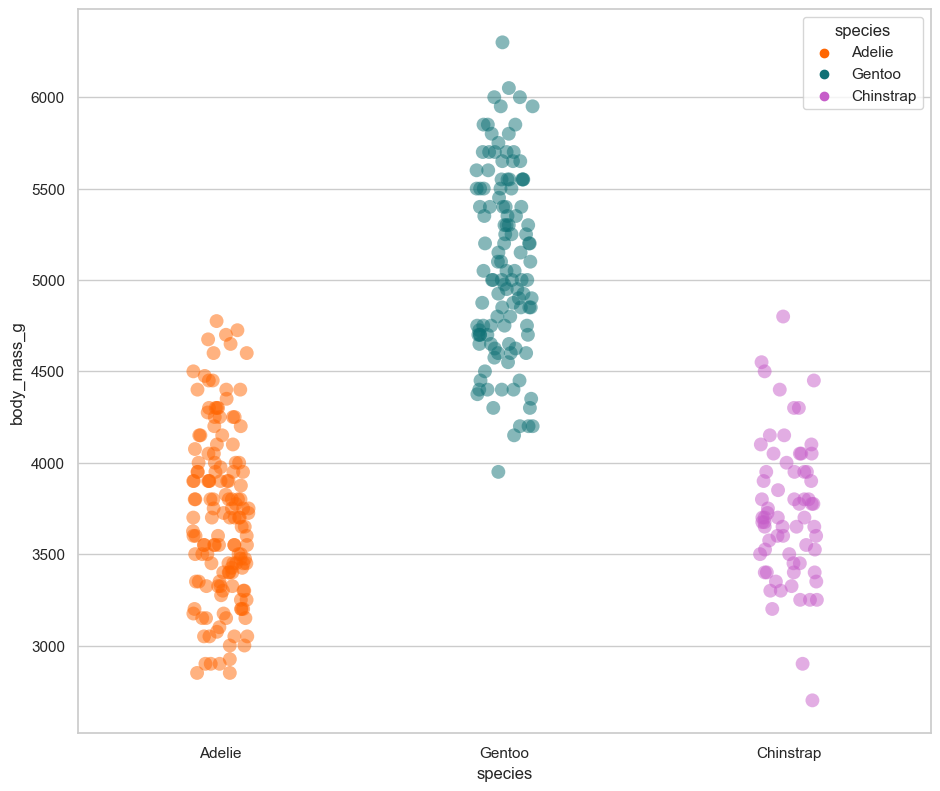

In [82]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='body_mass_g',
    hue='species',
    palette=penguin_color,
    alpha=1/2,
    s=10
)

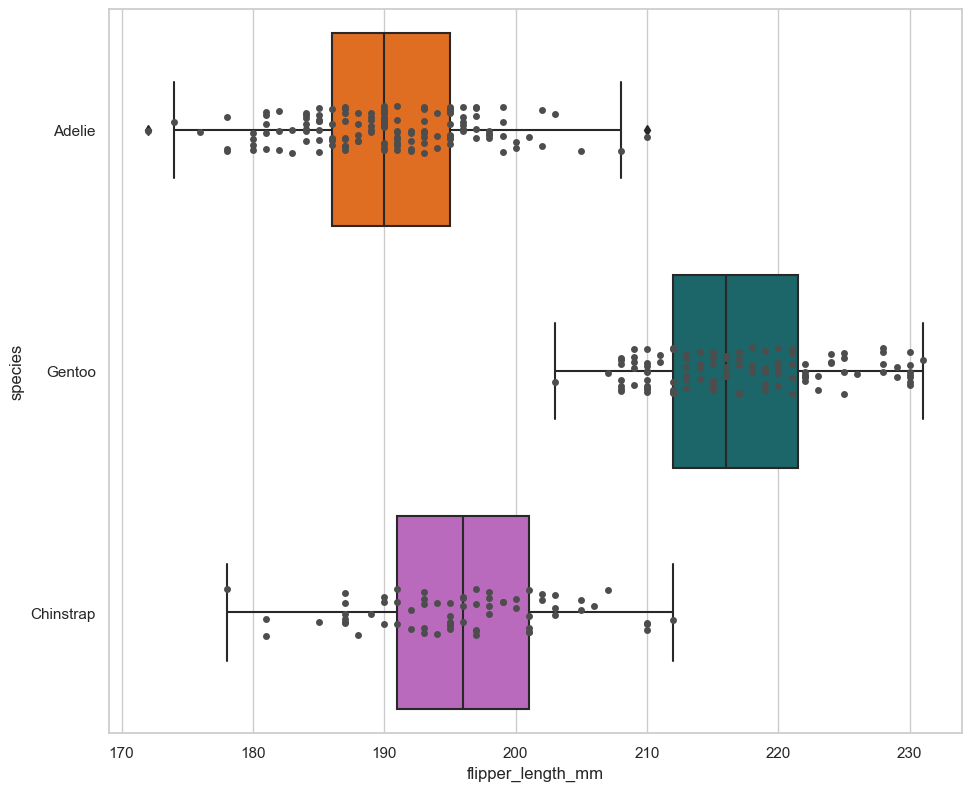

In [83]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color,

)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='0.3'
)

C:\Users\personal\AppData\Local\Temp\ipykernel_21584\3291187289.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(


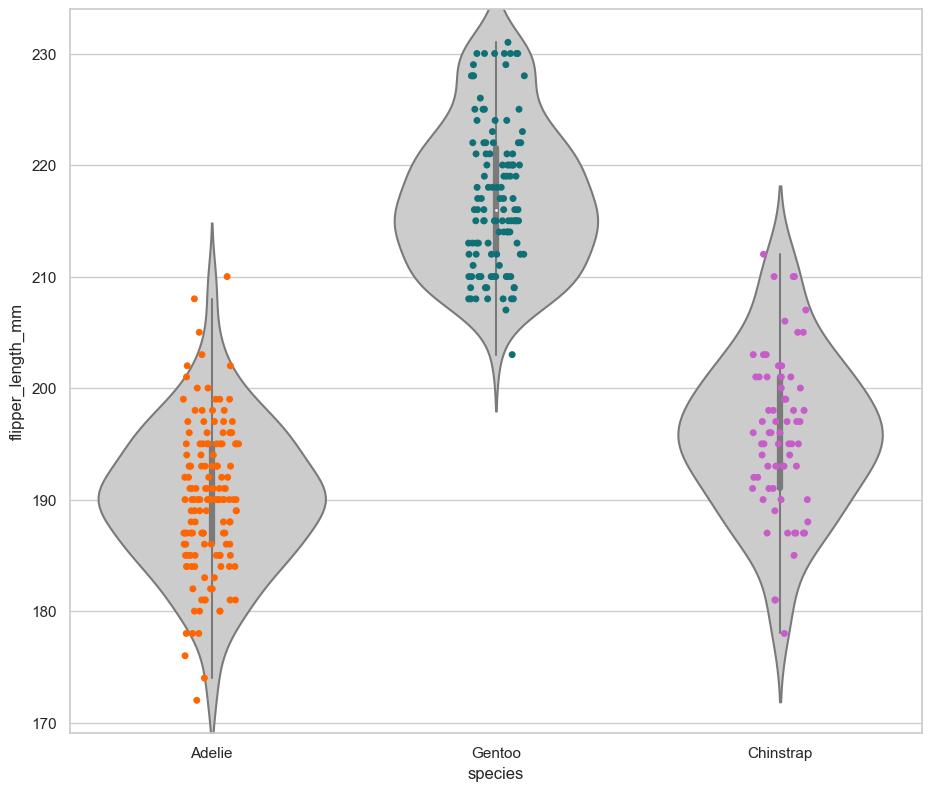

In [84]:
ax = sns.violinplot(
    data= processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color = '.8'
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

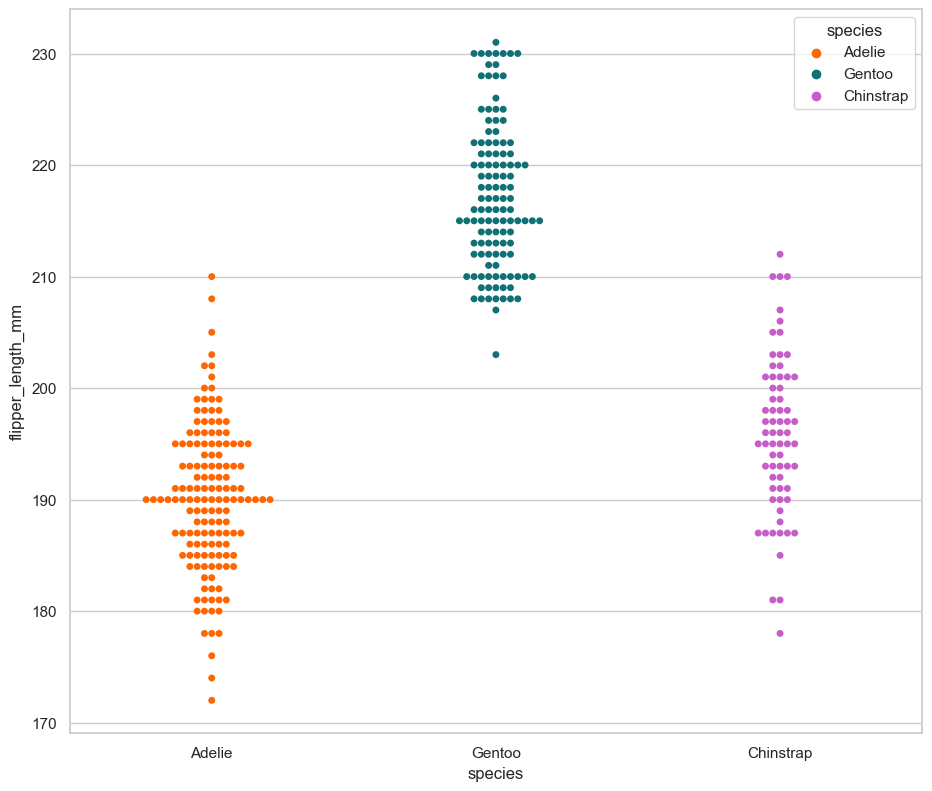

In [85]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [86]:
processed_penguins_df.select_dtypes(include=np.number).corr()

bill_length_mm  bill_depth_mm  flipper_length_mm   
bill_length_mm           1.000000      -0.228626           0.653096  \
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
year                     0.032657      -0.048182           0.151068   

                   body_mass_g      year  
bill_length_mm        0.589451  0.032657  
bill_depth_mm        -0.472016 -0.048182  
flipper_length_mm     0.872979  0.151068  
body_mass_g           1.000000  0.021862  
year                  0.021862  1.000000

## ¿Cómo puedo visualizar los coeficientes de correlación?

<Axes: >

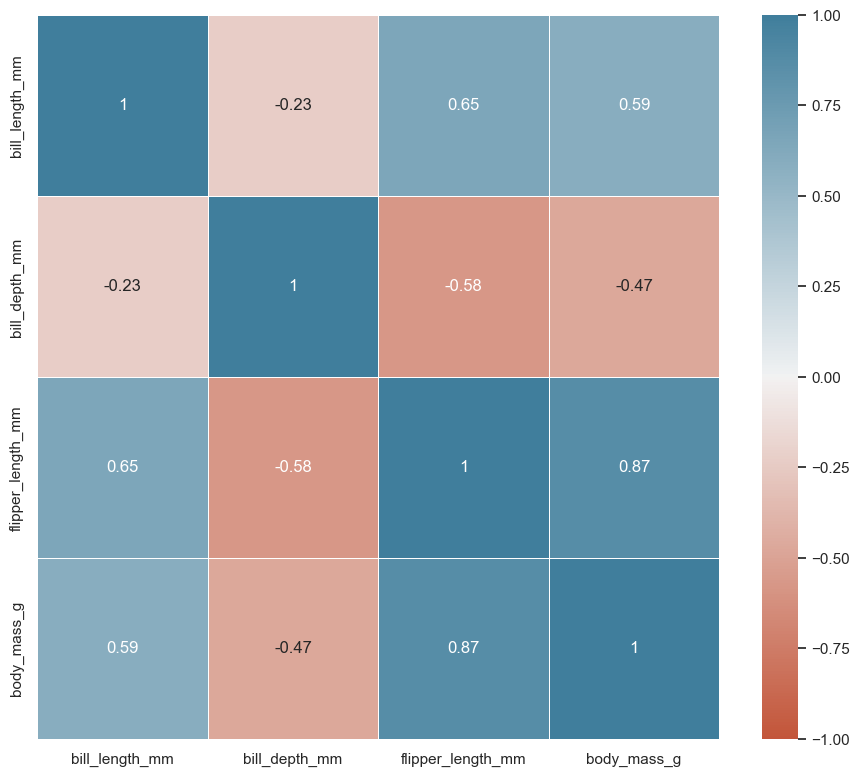

In [87]:
sns.heatmap(
    data= processed_penguins_df.drop(columns=['year']).select_dtypes(include=np.number).corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True,
)

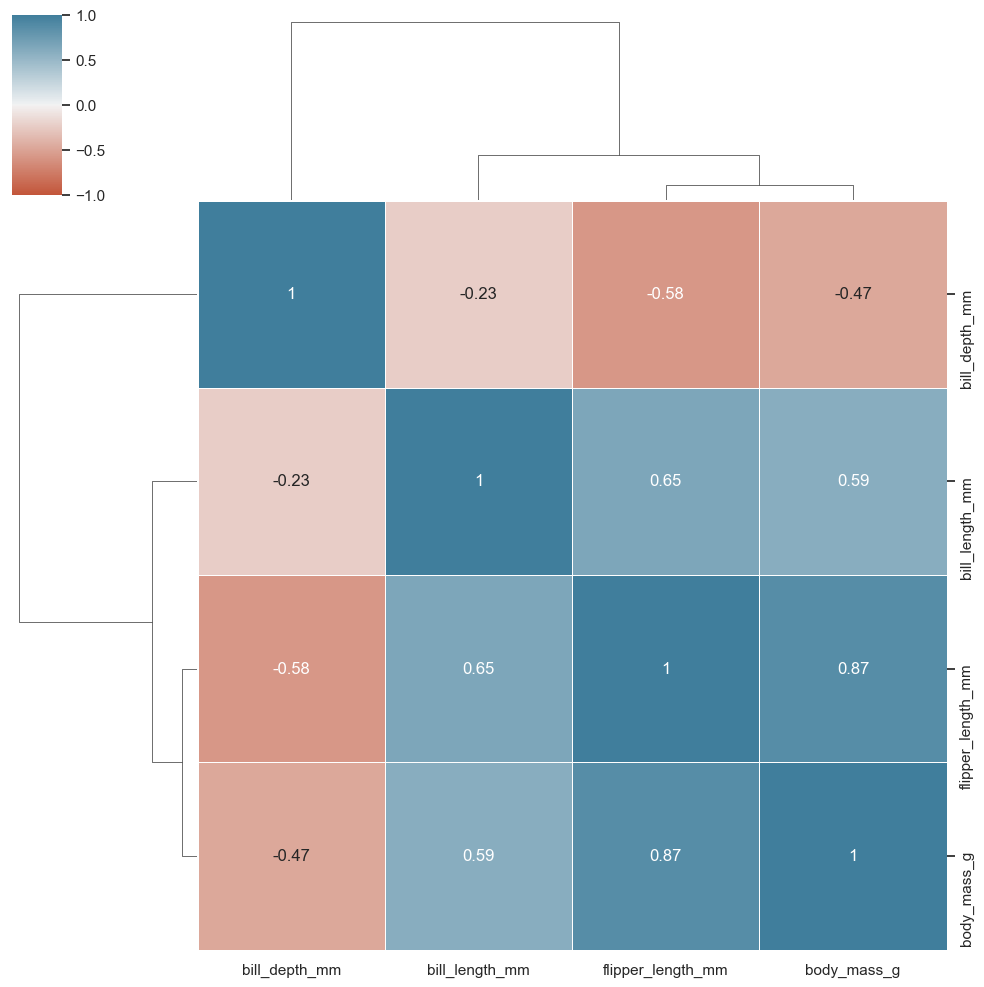

In [88]:
sns.clustermap(
    data= processed_penguins_df.drop(columns=['year']).select_dtypes(include=np.number).corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True,
)

## ¿Cómo podría representar una variable categórica como númerica discreta?

In [89]:
processed_penguins_df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [90]:
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['female','male'],[0,1])
    )
)


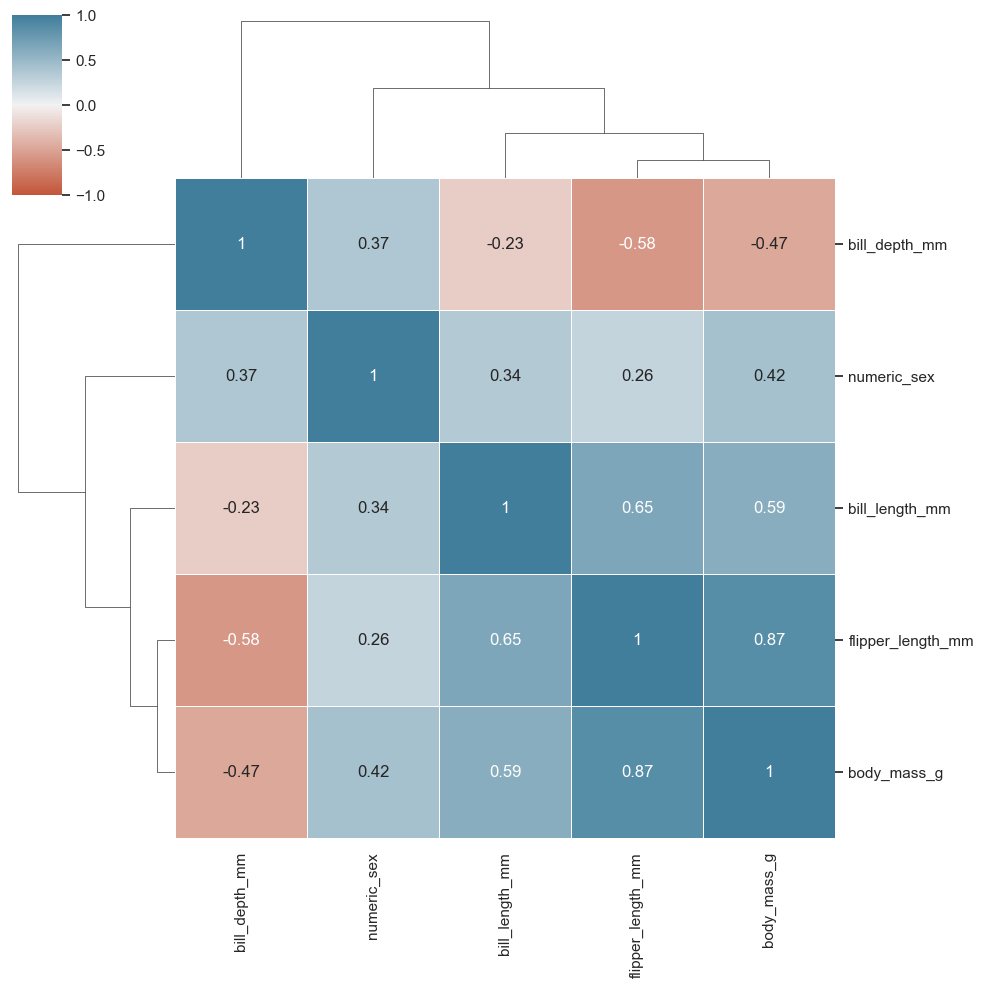

In [91]:
sns.clustermap(
    data= processed_penguins_df.drop(columns=['year']).select_dtypes(include=np.number).corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True,
)

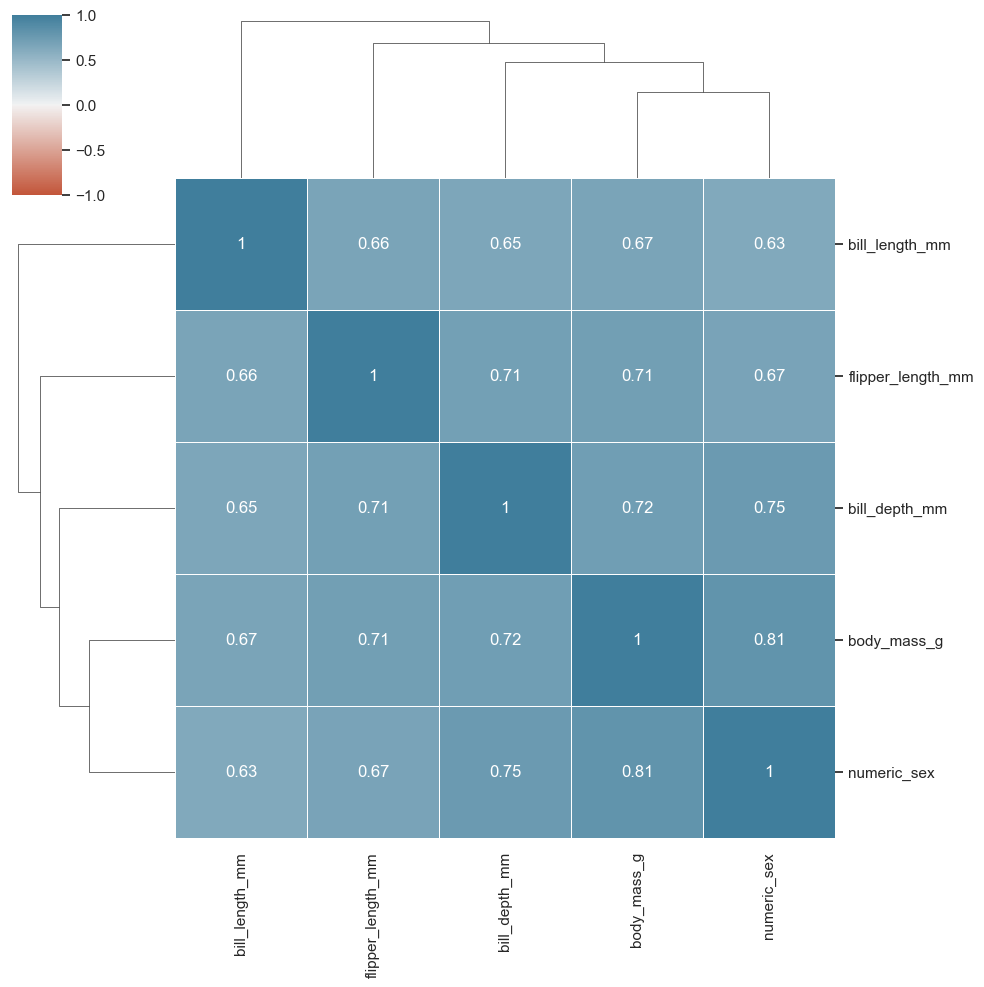

In [92]:
gentoo_df = processed_penguins_df[processed_penguins_df['species']=='Gentoo']
gentoo_corr_df = gentoo_df.drop(columns=['year']).select_dtypes(include=np.number).corr()

sns.clustermap(
    data=gentoo_corr_df,
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True,
)

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

array([[1.        , 0.00269802],
       [0.00269802, 1.        ]])

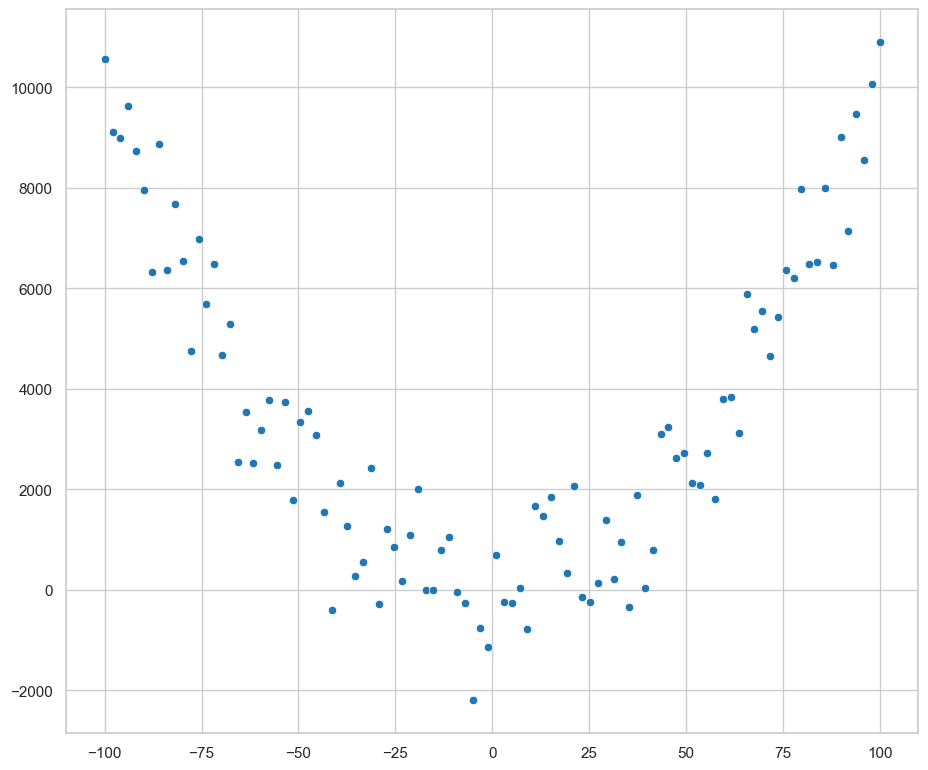

In [93]:
x = np.linspace(-100,100,100)
y = x**2
y += np.random.normal(0,1000,x.size)

sns.scatterplot(
    x=x,
    y=y
)

np.corrcoef(x,y)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

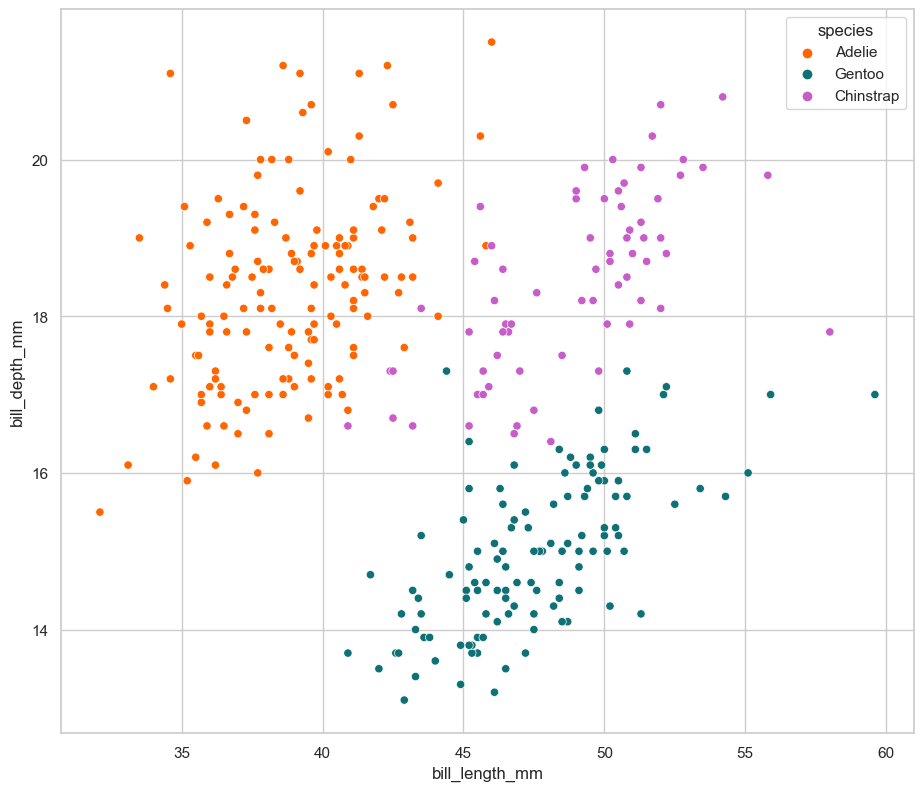

In [94]:
sns.scatterplot(
    data= processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=penguin_color
)

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


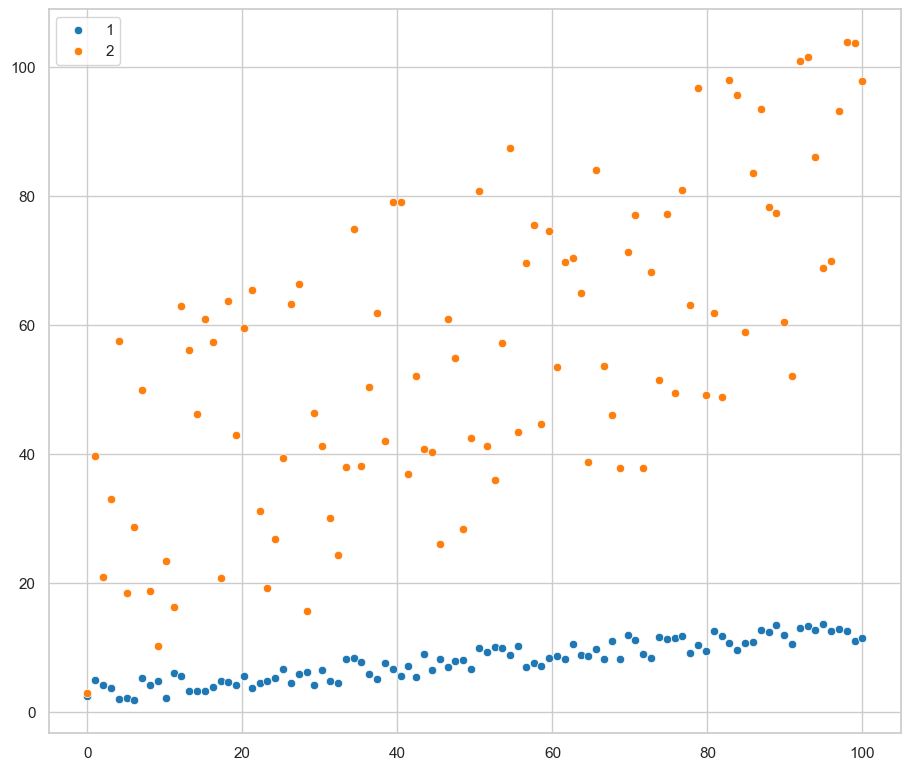

In [95]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

# Estableciendo relaciones: Análisis de regresión simple

In [96]:
res1 = scipy.stats.linregress(x=x1, y=y1)
res2 = scipy.stats.linregress(x=x2, y=y2)

print(res1,res2,sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


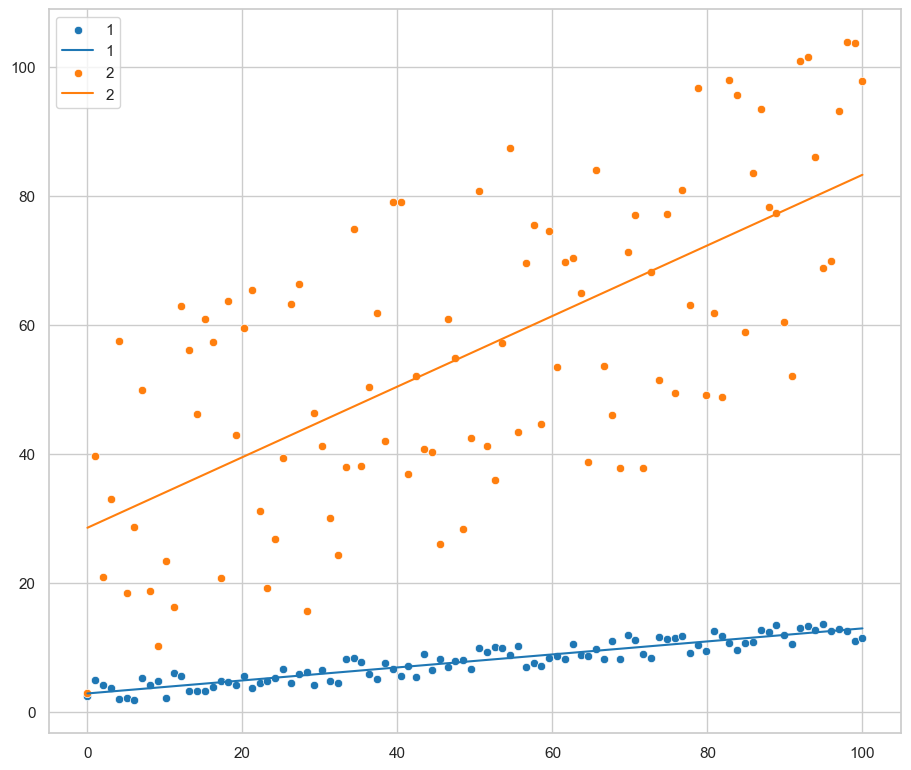

In [97]:
sns.scatterplot(
    x=x1,
    y=y1
)

fx_1 = np.array([x1.min(),x1.max()])
fy_1 = res1.intercept + res1.slope * fx_1

plt.plot(fx_1,fy_1)

sns.scatterplot(
    x=x2,
    y=y2
)

fx_2 = np.array([x2.min(),x2.max()])
fy_2 = res2.intercept + res2.slope * fx_2

plt.plot(fx_2,fy_2)

plt.legend(labels=['1','1','2','2'])

LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


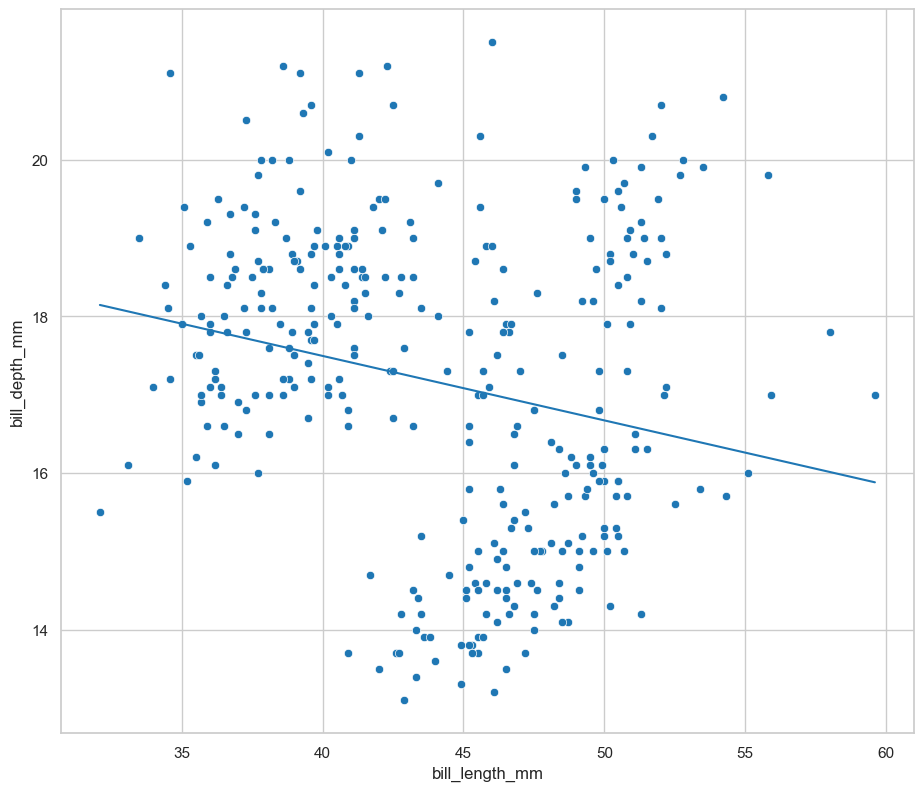

In [98]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguins = scipy.stats.linregress(
    x=processed_penguins_df.bill_length_mm,
    y=processed_penguins_df.bill_depth_mm
)

print(res_penguins)

fx_1 = np.array([processed_penguins_df.bill_length_mm.min(),processed_penguins_df.bill_length_mm.max()])
fy_1 = res_penguins.intercept + res_penguins.slope * fx_1

plt.plot(fx_1,fy_1)

LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


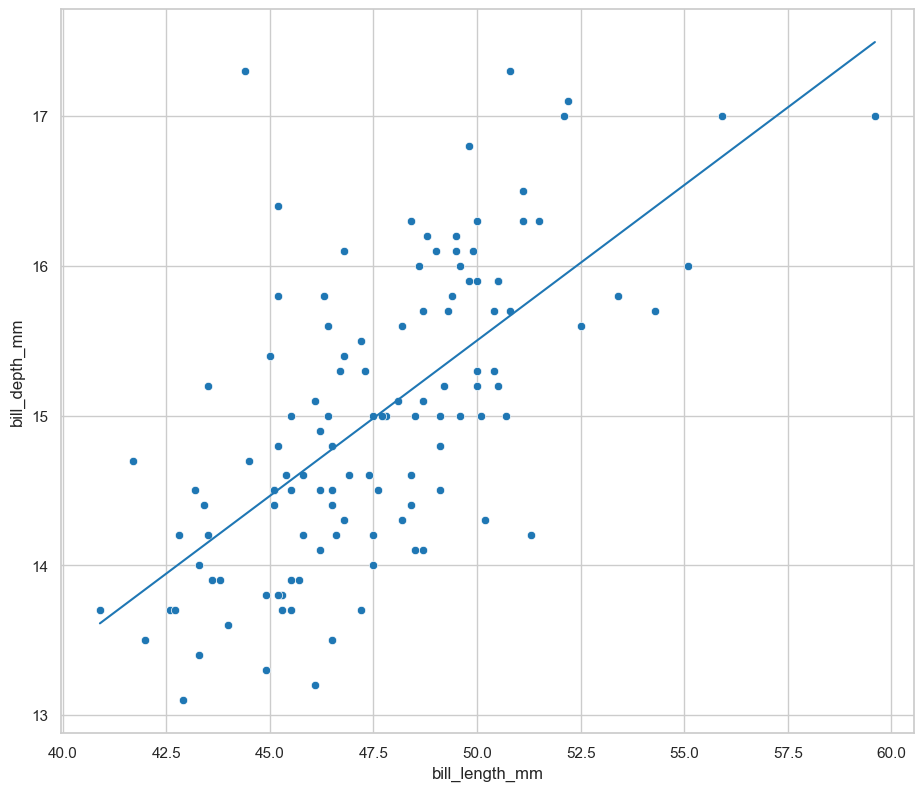

In [99]:
sns.scatterplot(
    data=gentoo_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguinsg = scipy.stats.linregress(
    x=gentoo_df.bill_length_mm,
    y=gentoo_df.bill_depth_mm
)

print(res_penguins)

fx_1g = np.array([gentoo_df.bill_length_mm.min(),gentoo_df.bill_length_mm.max()])
fy_1g = res_penguinsg.intercept + res_penguinsg.slope * fx_1g

plt.plot(fx_1g,fy_1g)

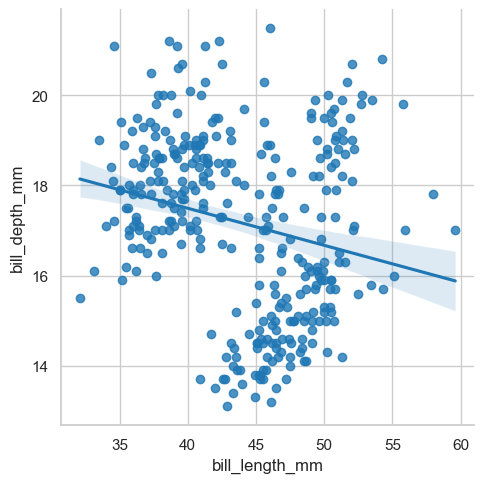

In [100]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

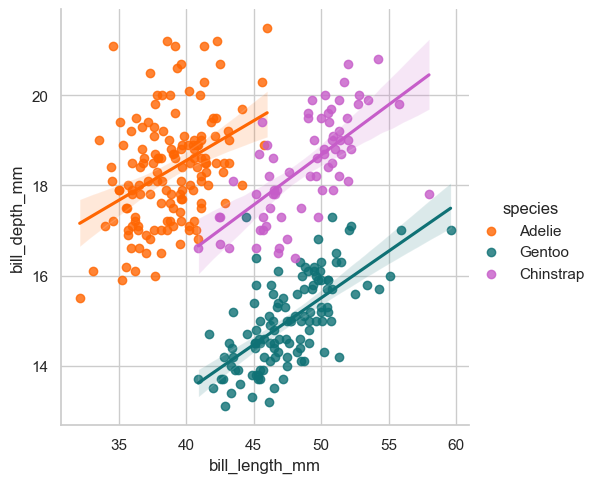

In [101]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=penguin_color
)

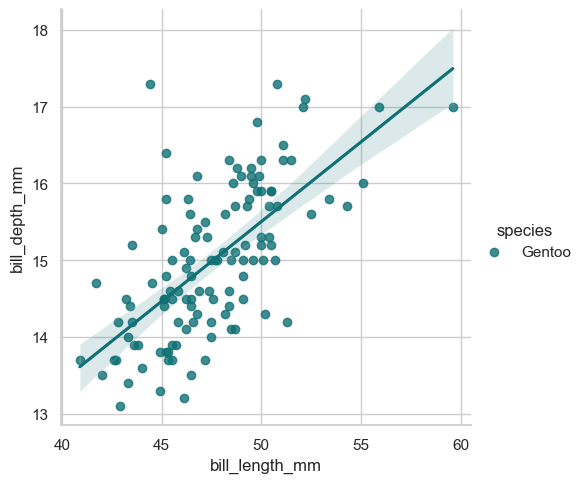

In [102]:
sns.lmplot(
    data=gentoo_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=penguin_color
)

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

In [103]:
x = processed_penguins_df.bill_length_mm
y = processed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x,y=y)
res_y_x = scipy.stats.linregress(x=y,y=x)

print(res_x_y,res_y_x, sep='\n')

LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195025, intercept=54.89085424504756, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


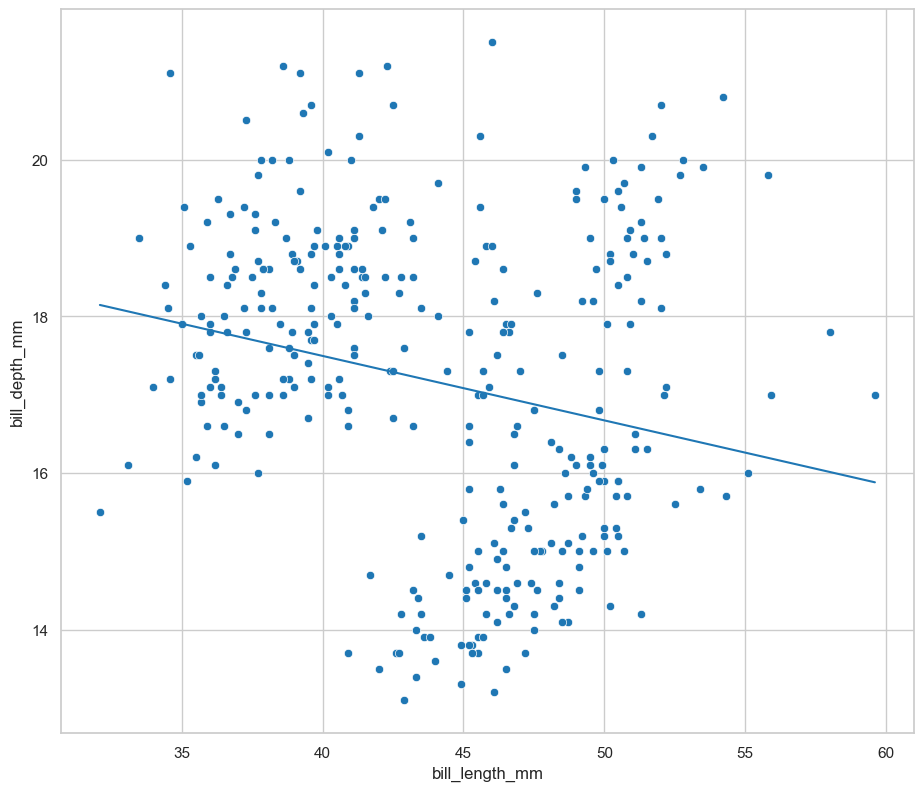

In [104]:
#Fig. 1
sns.scatterplot(
    x=x,
    y=y
)

fx_1= np.array([x.min(), x.max()])
fy_1= res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1);

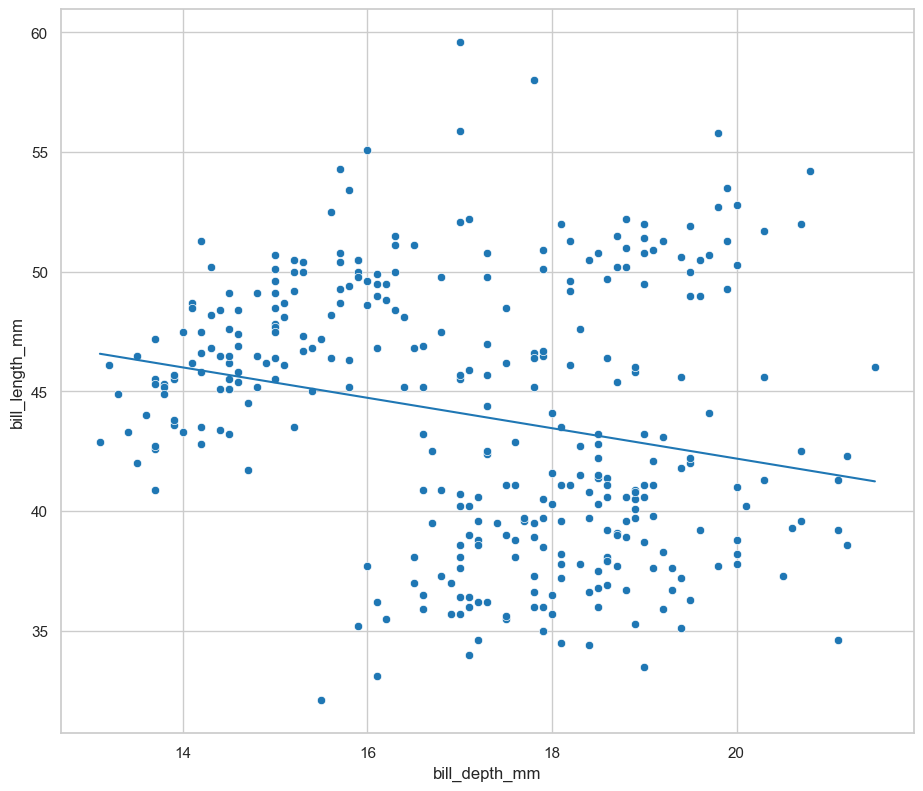

In [105]:
#Fig. 2
sns.scatterplot(
    x=y,
    y=x
)

fx_2= np.array([y.min(), y.max()])
fy_2= res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2)

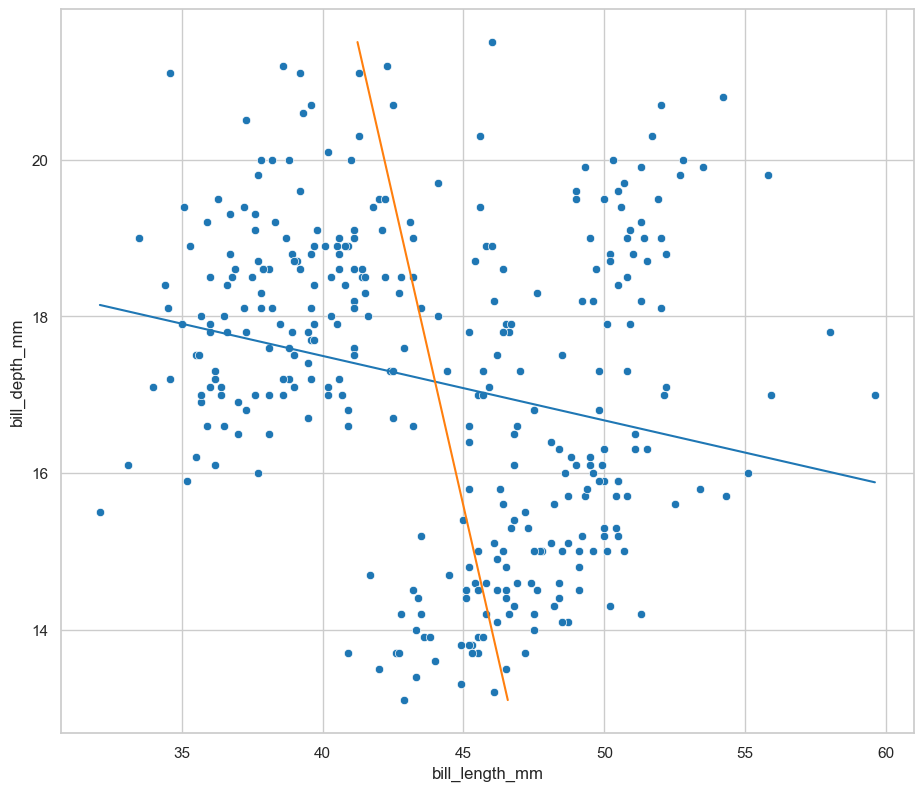

In [106]:
# Fig. 3
sns.scatterplot(
    x=x,
    y=y
)
plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [107]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm ',
        data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [108]:
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

In [109]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=processed_penguins_df
    )
    .fit()
    
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.54e-32
Time:                        01:13:48   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 2

In [110]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=processed_penguins_df
    )
    .fit()
    
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Tue, 09 May 2023   Prob (F-statistic):           7.04e-46
Time:                        01:13:48   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
model_g = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=gentoo_df
    )
    .fit()
    
)

model_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     82.91
Date:                Tue, 09 May 2023   Prob (F-statistic):           4.38e-23
Time:                        01:13:48   Log-Likelihood:                -855.43
No. Observations:                 119   AIC:                             1717.
Df Residuals:                     116   BIC:                             1725.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1333.7152    502.228     -2.656      0.009   -2328.441    -338.989
bill_length_mm    54.7023     12.713      4.303      0.000      29.522      79.883
bill_depth_mm    254.9950     40.050      6.367      0.000     175.671     334.319
==============================================================================
Omnibus:                        4.956   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.571
Skew:                           0.475   Prob(JB):                        0.102
Kurtosis:                       3.145   Cond. No.                         844.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 3

In [112]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=processed_penguins_df
    )
    .fit()
    
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Tue, 09 May 2023   Prob (F-statistic):          9.26e-103
Time:                        01:13:48   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

In [113]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
    
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Tue, 09 May 2023   Prob (F-statistic):          6.28e-122
Time:                        01:13:49   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
model_4g = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(sex) ',
        data=gentoo_df
    )
    .fit()
    
)

model_4g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     73.24
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.33e-30
Time:                        01:13:49   Log-Likelihood:                -832.53
No. Observations:                 119   AIC:                             1675.
Df Residuals:                     114   BIC:                             1689.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -496.3272   1091.308     -0.455      0.650   -2658.201    1665.546
C(sex)[T.male]      491.2351     80.375      6.112      0.000     332.014     650.457
flipper_length_mm    15.3900      5.929      2.596      0.011       3.646      27.134
bill_length_mm       24.0408     11.622      2.069      0.041       1.018      47.064
bill_depth_mm        56.6881     43.197      1.312      0.192     -28.885     142.261
==============================================================================
Omnibus:                        2.044   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.599
Skew:                           0.269   Prob(JB):                        0.449
Kurtosis:                       3.181   Cond. No.                     9.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 5

In [115]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~  flipper_length_mm + C(sex) +  C(species)',
        data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     534.0
Date:                Tue, 09 May 2023   Prob (F-statistic):          3.37e-142
Time:                        01:13:49   Log-Likelihood:                -2364.4
No. Observations:                 333   AIC:                             4739.
Df Residuals:                     328   BIC:                             4758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -365.8174    532.050     -0.688      0.492   -1412.479     680.844
C(sex)[T.male]            530.3811     37.810     14.027      0.000     456.000     604.762
C(species)[T.Chinstrap]   -87.6345     46.347     -1.891      0.060    -178.810       3.541
C(species)[T.Gentoo]      836.2600     85.185      9.817      0.000     668.681    1003.839
flipper_length_mm          20.0249      2.846      7.037      0.000      14.427      25.623
==============================================================================
Omnibus:                        1.575   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.556
Skew:                           0.094   Prob(JB):                        0.459
Kurtosis:                       2.723   Cond. No.                     6.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando resultados

#### Creación de tabla de resultados

In [116]:
models_results = pd.DataFrame(
    dict(
        actual_values=processed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=processed_penguins_df.species,
        sex=processed_penguins_df.sex
    )
)

models_results

actual_values  prediction_model_1  prediction_model_2   
0           3750.0         3782.402961         3617.641192  \
1           3800.0         3817.119665         3836.725580   
2           3250.0         3886.553073         3809.271371   
4           3450.0         3574.102738         3350.786581   
5           3650.0         3799.761313         3356.140070   
..             ...                 ...                 ...   
339         4000.0         5231.825347         4706.954140   
340         3400.0         4164.286703         4034.121055   
341         3775.0         4693.716437         4475.927353   
342         4100.0         4797.866549         4449.296758   
343         3775.0         4745.791493         4448.061337   

     prediction_model_3  prediction_model_4  prediction_model_5    species   
0           3204.761227         3579.136946         3789.073338     Adelie  \
1           3436.701722         3343.220772         3358.816820     Adelie   
2           3906.897032         3639.137335         3539.041059     Adelie   
4           3816.705772         3457.954243         3498.991228     Adelie   
5           3696.168128         3764.536023         3969.297576     Adelie   
..                  ...                 ...                 ...        ...   
339         4599.187485         4455.022405         4222.086661  Chinstrap   
340         4274.552753         3894.857519         3591.580989  Chinstrap   
341         3839.563668         4063.639819         3941.737845  Chinstrap   
342         4720.740455         4652.013882         4282.161407  Chinstrap   
343         4104.268240         3672.299099         3511.481328  Chinstrap   

        sex  
0      male  
1    female  
2    female  
4    female  
5      male  
..      ...  
339    male  
340  female  
341    male  
342    male  
343  female  

[333 rows x 8 columns]

In [117]:
models_results_g = pd.DataFrame(
    dict(
        actual_values_g = gentoo_df.body_mass_g,
        prediction_model_1g = model_g.predict(),
        prediction_model_2g = model_4g.predict(),
        sex=gentoo_df.sex
    )
)
models_results_g

actual_values_g  prediction_model_1g  prediction_model_2g     sex
152           4500.0          4553.996427          4607.524752  female
153           5700.0          5557.819989          5660.661897    male
154           4450.0          4925.717995          4705.660000  female
155           5700.0          5277.325515          5413.625002    male
156           5400.0          4967.543410          5270.075517    male
..               ...                  ...                  ...     ...
270           4925.0          4741.666491          4708.483632  female
272           4850.0          4872.782541          4748.270171  female
273           5750.0          5426.703940          5513.145349    male
274           5200.0          4912.756282          4691.978983  female
275           5400.0          5501.350760          5385.290185    male

[119 rows x 4 columns]

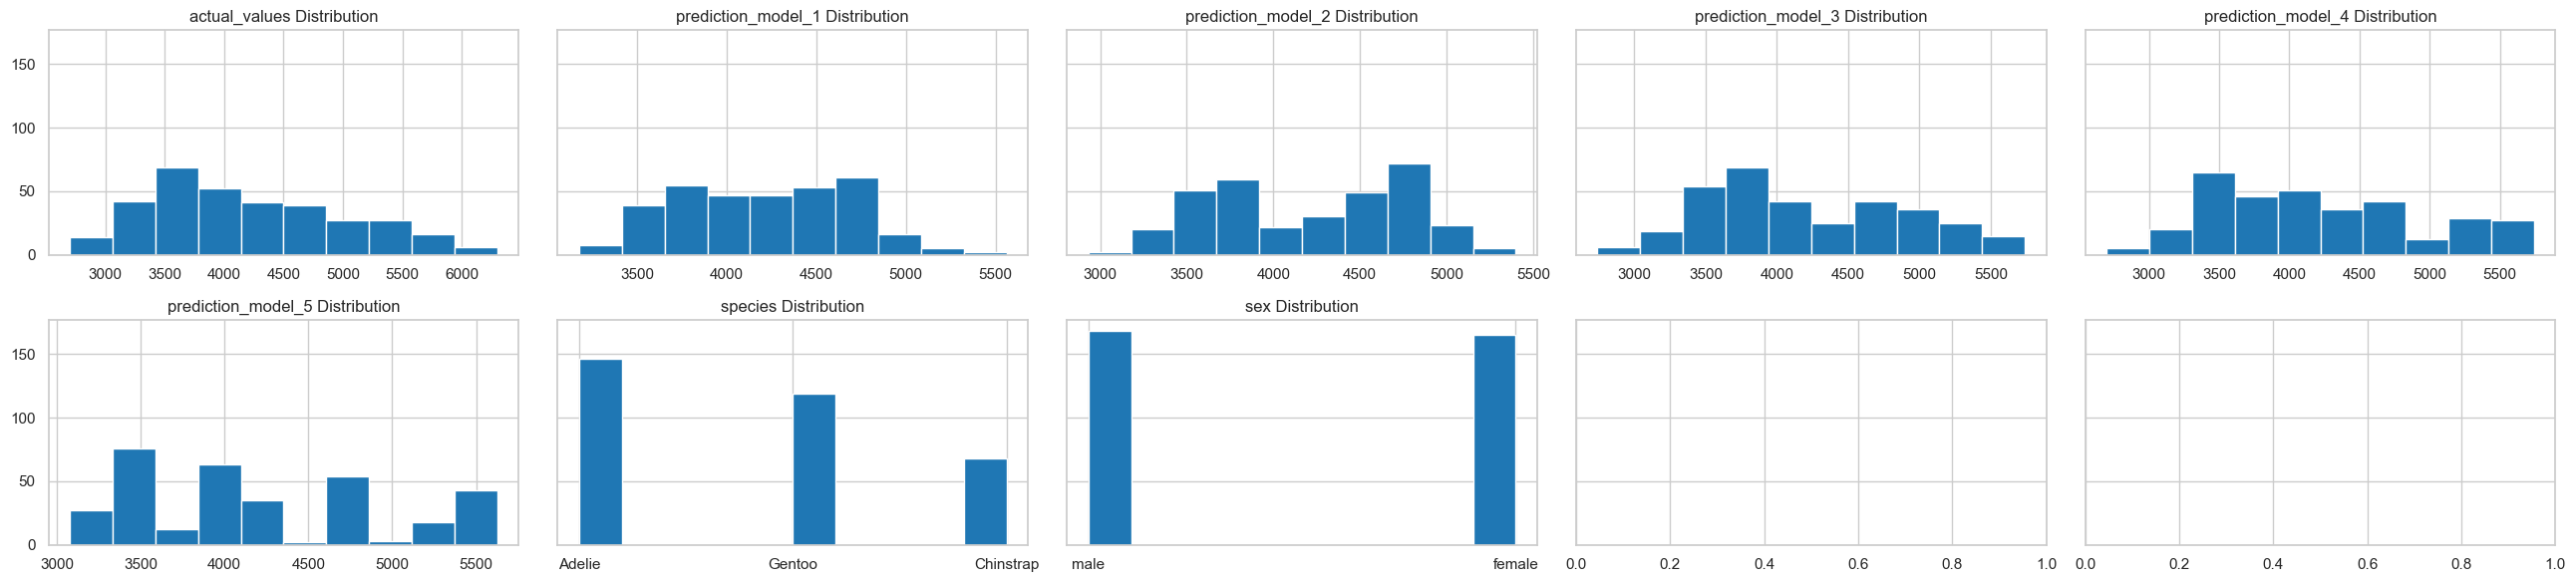

In [118]:
variables = models_results.columns
def draw_histograms(models_results, variables):
    n_rows = 2
    n_cols = 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, 6), sharey=True)
    for var_name, ax in zip(variables, axes.flatten()):
        ax.hist(models_results[var_name])
        ax.set(title=f"{var_name} Distribution")
    fig.tight_layout()
    plt.show()

draw_histograms(models_results, variables)


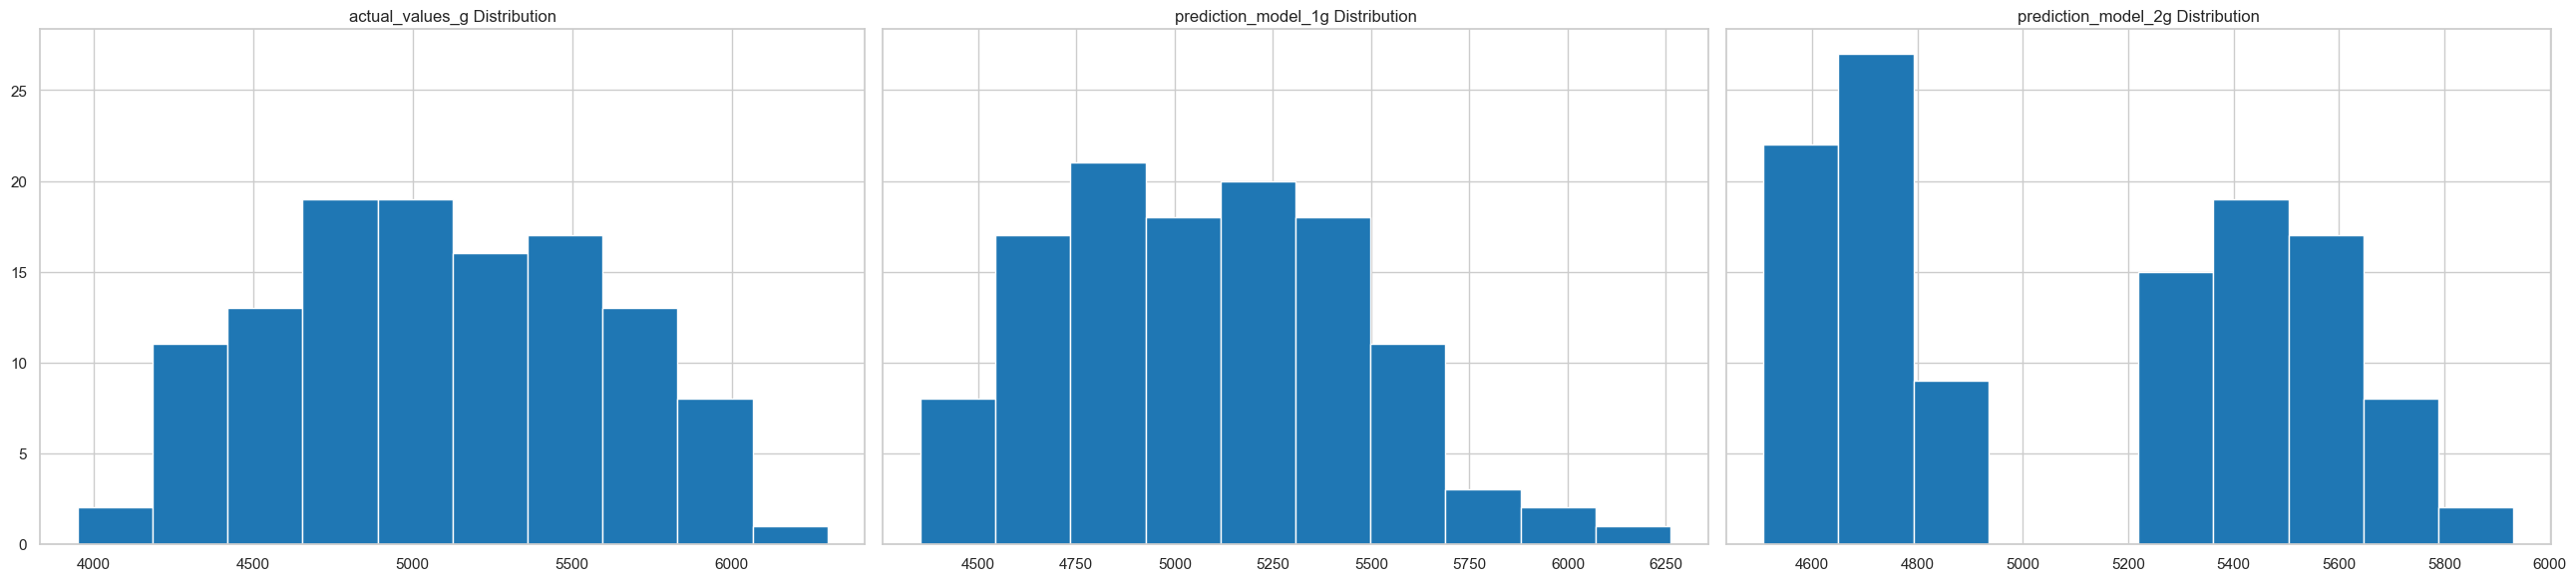

In [119]:
variables = models_results_g.columns
def draw_histograms(models_results, variables):
    n_rows = 1
    n_cols = 3
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, 6), sharey=True)
    for var_name, ax in zip(variables, axes.flatten()):
        ax.hist(models_results_g[var_name])
        ax.set(title=f"{var_name} Distribution")
    fig.tight_layout()
    plt.show()

draw_histograms(models_results, variables)

#### ECDFs

<Axes: ylabel='Proportion'>

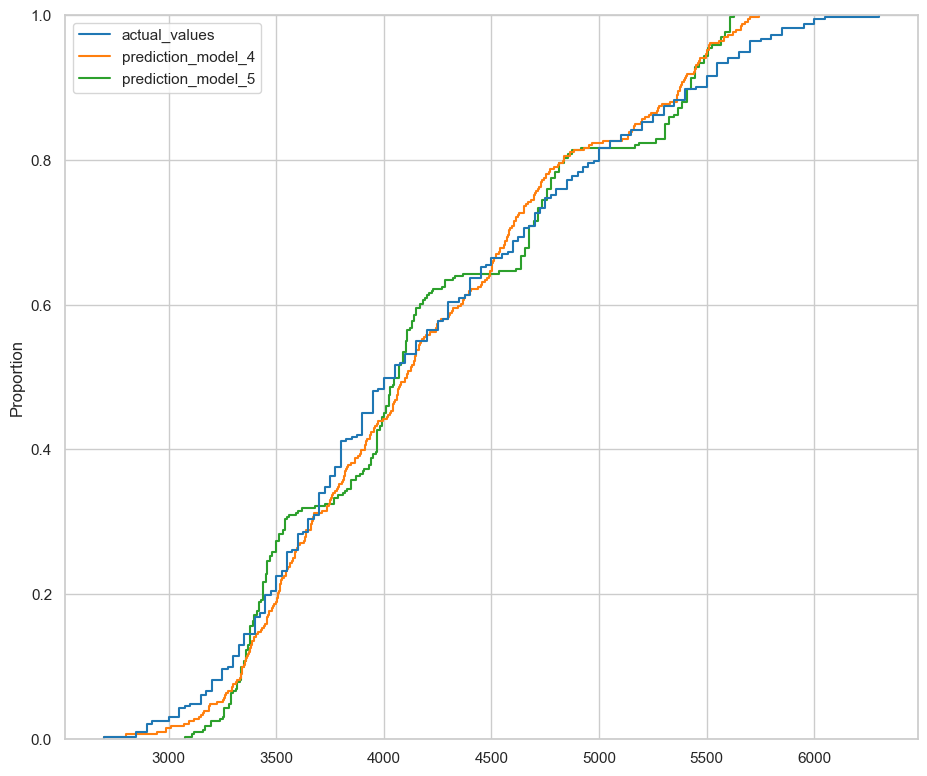

In [120]:
sns.ecdfplot(
    data=models_results.select_columns(['actual_values' ,  'prediction_model_4', 'prediction_model_5'])
)

<Axes: ylabel='Proportion'>

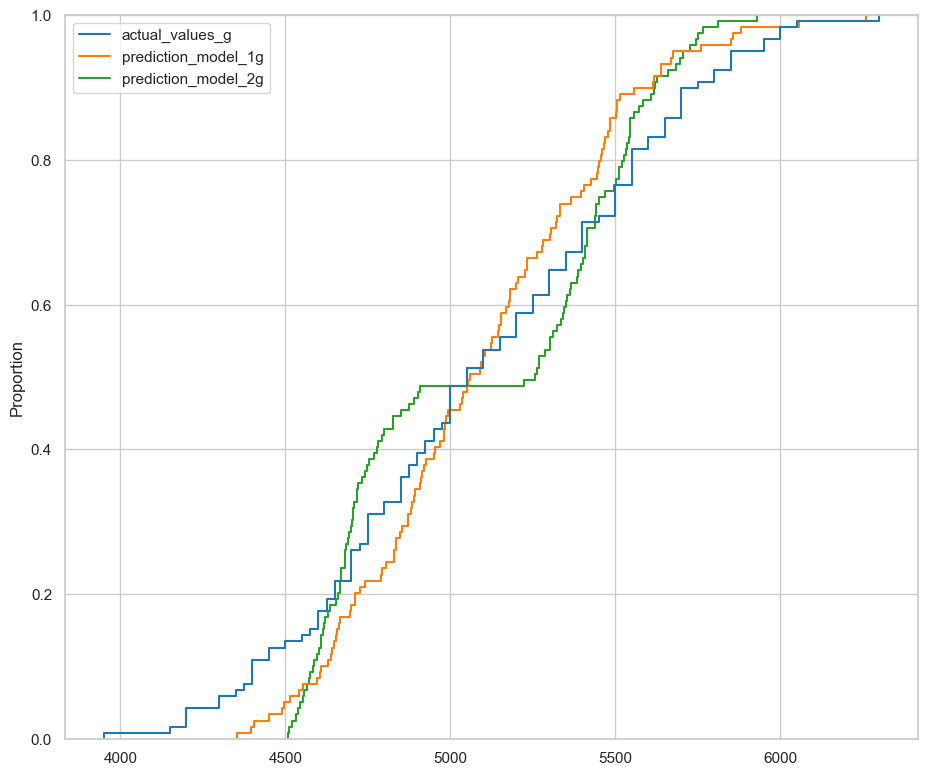

In [121]:
sns.ecdfplot(
    data=models_results_g
)

#### PDFs

<Axes: ylabel='Density'>

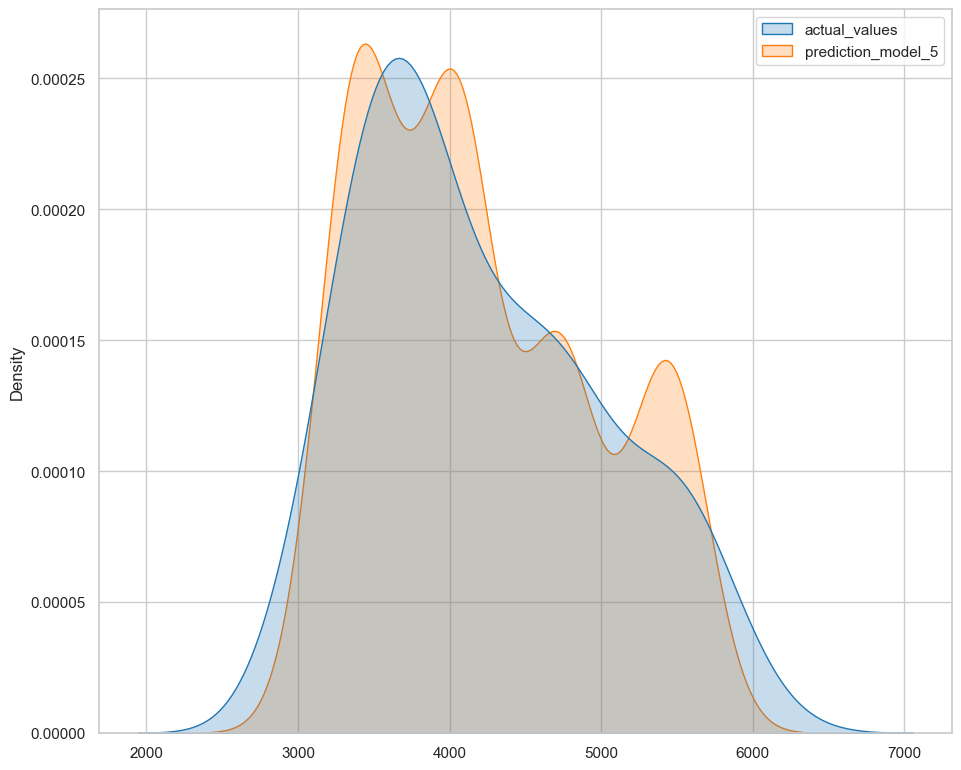

In [122]:
sns.kdeplot(
    data=models_results.select_columns(['actual_values' ,  'prediction_model_5']),
    fill= True
)

<Axes: ylabel='Density'>

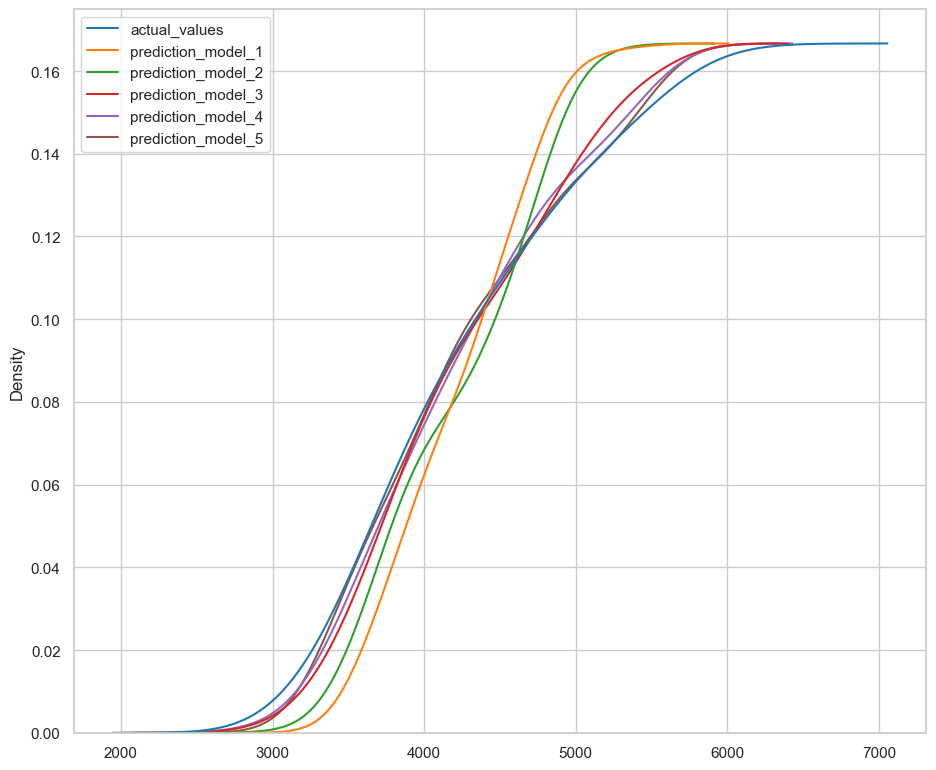

In [123]:
sns.kdeplot(
    data=models_results,
    cumulative= True
)

<Axes: ylabel='Density'>

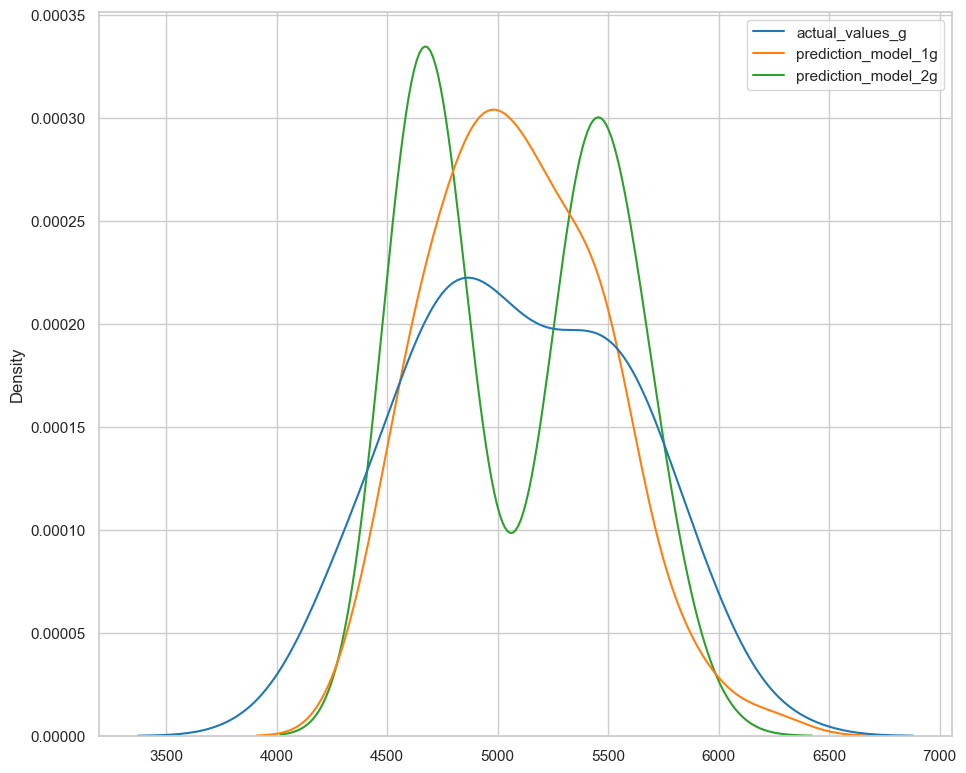

In [124]:
sns.kdeplot(
    data=models_results_g
)

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

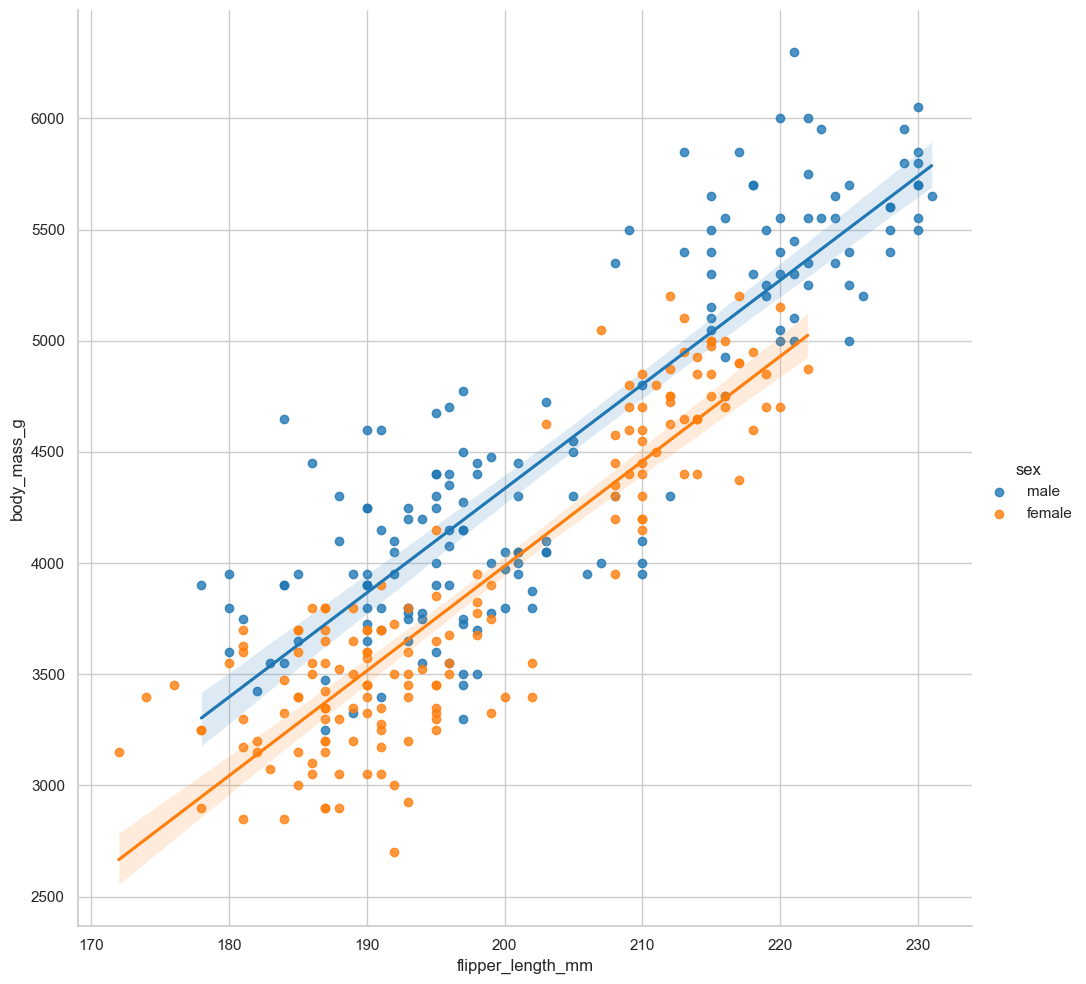

In [125]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

In [126]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.4793
Time:                        01:13:57   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [127]:
#Just changing the categorical island data
model = smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island, Treatment("Dream"))',
    data=processed_penguins_df
).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.4793
Time:                        01:13:57   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                    -63.0060      7.014     -8.983      0.000     -76.754     -49.258
C(island, Treatment("Dream"))[T.Biscoe]        1.5596      0.493      3.163      0.002       0.593       2.526
C(island, Treatment("Dream"))[T.Torgersen]     0.5273      0.556      0.948      0.343      -0.563       1.617
flipper_length_mm                              0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm                                 0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm                                  1.6401      0.185      8.864      0.000       1.277       2.003
==============================================================================================================
"""

## Exploración de nuestras variables categóricas

In [128]:
(
    processed_penguins_df
    .value_counts(['island', 'sex'])
    .reset_index(name='count')
)

island     sex  count
0     Biscoe    male     83
1     Biscoe  female     80
2      Dream    male     62
3      Dream  female     61
4  Torgersen  female     24
5  Torgersen    male     23

In [129]:
(
    processed_penguins_df
    .value_counts(['species', 'sex'])
    .reset_index(name='count')
)

species     sex  count
0     Adelie  female     73
1     Adelie    male     73
2     Gentoo    male     61
3     Gentoo  female     58
4  Chinstrap  female     34
5  Chinstrap    male     34

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

In [130]:
processed_penguins_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [131]:
processed_penguins_df_a = (
    processed_penguins_df
    .assign(
        is_adelie=lambda df: df.species.replace(['Adelie','Gentoo','Chinstrap'],[1,0,0])
    )
)

In [132]:
model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=processed_penguins_df_a
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [133]:
is_adelie_df_predictions = pd.DataFrame(
    dict(
        actual_adelie = processed_penguins_df_a.is_adelie,
        predicted_val = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions

actual_adelie  predicted_val
0                1            1.0
1                1            1.0
2                1            0.0
4                1            1.0
5                1            1.0
..             ...            ...
339              0            0.0
340              0            0.0
341              0            1.0
342              0            0.0
343              0            0.0

[333 rows x 2 columns]

In [134]:
(
    is_adelie_df_predictions
    .value_counts(['actual_adelie', 'predicted_val'])
    .reset_index(name='count')
)

actual_adelie  predicted_val  count
0              0            0.0    151
1              1            1.0    129
2              0            1.0     36
3              1            0.0     17

In [135]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_val
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_val
)


[[151  36]
 [ 17 129]]


0.8408408408408409

In [144]:
processed_penguins_df.dtypes.value_counts()

float64    4
int64      4
object     3
Name: count, dtype: int64

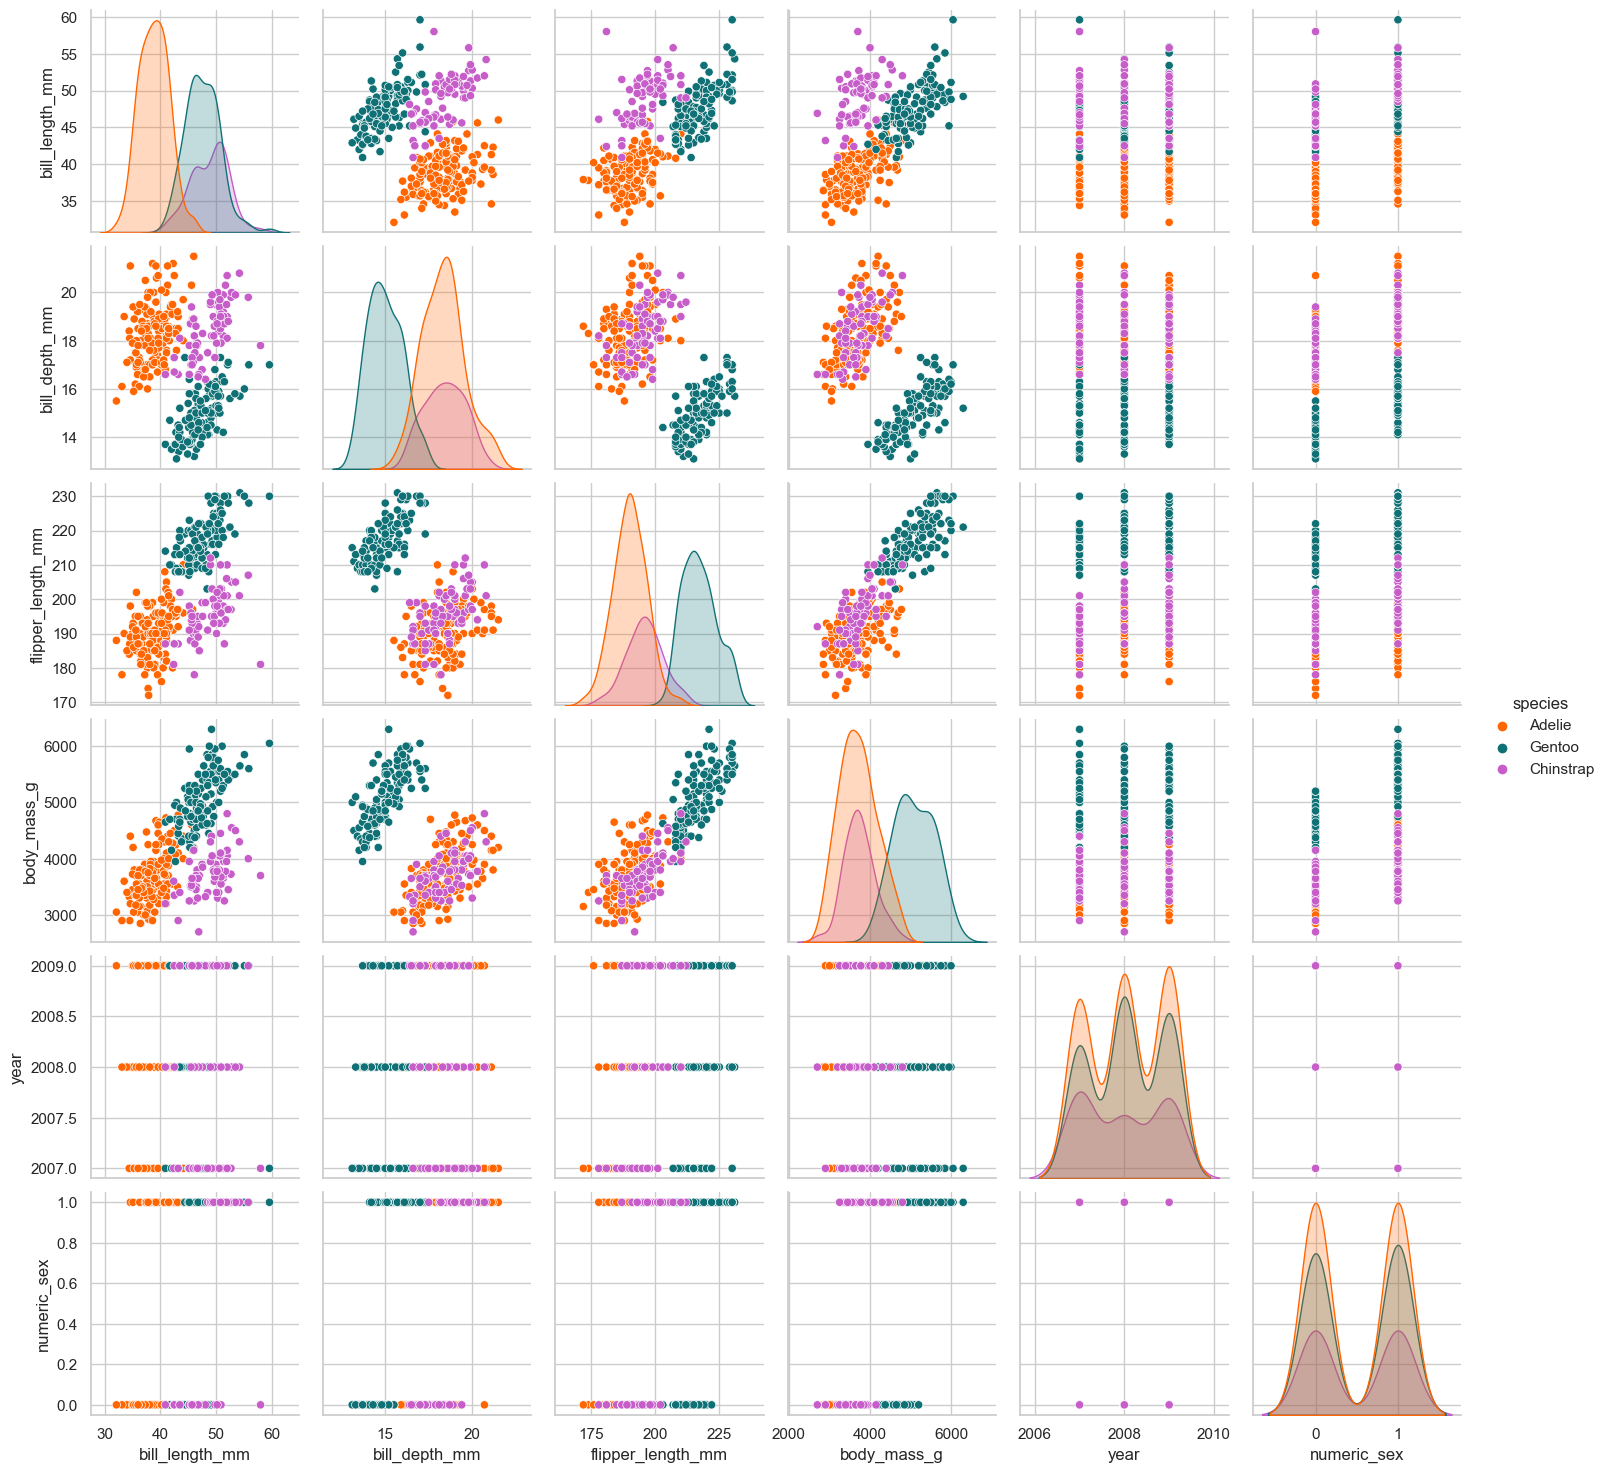

In [136]:
sns.pairplot(
    data=processed_penguins_df,
    hue='species',
    palette=penguin_color
)

In [137]:
from sklearn.manifold import TSNE
import plotly.express as px
from umap import UMAP

processed_penguins_df = (
    processed_penguins_df
    .assign(
        is_species_numeric=lambda df: df.species.replace(['Adelie','Gentoo','Chinstrap'],[0,1,2])
    )
)
processed_penguins_df = (
    processed_penguins_df
    .assign(
        is_island_numeric=lambda df: df.island.replace(['Torgersen', 'Biscoe', 'Dream'],[0,1,2])
    )
)

features = processed_penguins_df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year', 'numeric_sex',
       'is_island_numeric', 'is_species_numeric']]

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=processed_penguins_df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show()

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=processed_penguins_df.species,
    labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=processed_penguins_df.species,
    labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=3)

fig_2d.show()
fig_3d.show()


c:\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Python311\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 